# Classification Project 1 and 2

Source of the Dataset - https://www.kaggle.com/sonujha090/bank-marketing?select=bank-full.csv

## About the dataset

The selected dataset for classification problem is a Bank Marketing Dataset. The goal of the project is to predict the people that are willing to subscribe to the bank term. We also want to minimize the amount false positives of reaching out to people that will not actually subscribe. We are minimizing the amount of false positives because there is certainly a marketing and time cost to reachout to the potential clients

### Bank Marketing Dataset
#### 1 - age (numeric)
#### 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#### "blue-collar","self-employed","retired","technician","services")
#### 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#### 4 - education (categorical: "unknown","secondary","primary","tertiary")
#### 5 - default: has credit in default? (binary: "yes","no")
#### 6 - balance: average yearly balance, in euros (numeric)
#### 7 - housing: has housing loan? (binary: "yes","no")
#### 8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:
#### 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
#### 10 - day: last contact day of the month (numeric)
#### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#### 12 - duration: last contact duration, in seconds (numeric)

### other attributes:
#### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
#### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
#### 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Classification Project Part 1

In [1]:
import pandas as pd
import numpy as np

# Plotting Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from scipy.stats import kurtosis 
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# number of jobs for parallel processing
jobs = 10

In [4]:
df_classification = pd.read_csv('bank-full.csv')
df_classification.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df_classification.shape

(45211, 17)

In [6]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df_classification.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### We can see that the dataset contains few 'Unknown' values. Lets replace them with np.nan.

In [8]:
# replacing 'unknown' with np.nan
df_classification = df_classification.replace('unknown', np.nan)

In [9]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df_classification.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Checking percentage of missing vallues present in the dataset

In [11]:
total = df_classification.isnull().sum().sum()
percentage = round((df_classification.isnull().sum().sum())/(df_classification.shape[0] * df_classification.shape[1])*100,2)
print('Total Number Of missing values present in the dataset is: ', total)
print('Percentage of missing values in the dataset is: ', percentage)

Total Number Of missing values present in the dataset is:  52124
Percentage of missing values in the dataset is:  6.78


#### We can see that the percentage of missing data is 6.78% which is between 5-10%

### Encoding categorical variables

#### 1. 'housing' variable

In [12]:
# checking unique values in 'housing' variable
df_classification['housing'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df_classification['housing'] = df_classification['housing'].apply(lambda x: 0 if x=='no' else 1)

In [14]:
# Now checking the unique values in 'housing' variable
df_classification['housing'].unique()

array([1, 0])

#### 2. 'loan' variable

In [15]:
# checking unique values in 'loan' variable
df_classification['loan'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df_classification['loan'] = df_classification['loan'].apply(lambda x: 0 if x=='no' else 1)

In [17]:
# Now checking the unique values in 'loan' variable
df_classification['loan'].unique()

array([0, 1])

#### 3. 'default' variable

In [18]:
# checking unique values in 'loan' variable
df_classification['default'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df_classification['default'] = df_classification['default'].apply(lambda x: 0 if x=='no' else 1)

In [20]:
# Now checking the unique values in 'default' variable
df_classification['default'].unique()

array([0, 1])

#### 5. Target variable - 'y'

In [21]:
# checking unique values in target variable 'y'
df_classification['y'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df_classification['y'] = df_classification['y'].apply(lambda x: 0 if x=='no' else 1)

In [23]:
# Now checking the unique values in target variable 'y'
df_classification['y'].unique()

array([0, 1])

In [24]:
# checking the dataframe
df_classification.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


# Exploratory Data Analysis

### 1. Correlation Matrix - Heat Map

<AxesSubplot:>

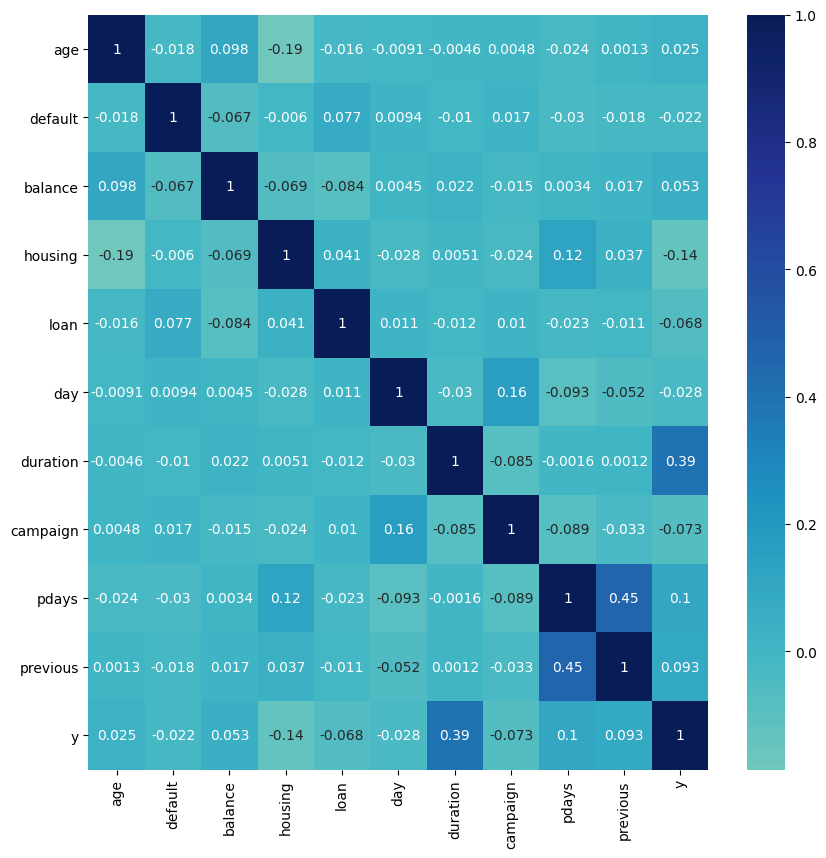

In [25]:
#heatmap
corrmat = plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(df_classification.corr(),cmap='YlGnBu',annot=True,center=0)

In [26]:
#setting aesthetic stylle of the plots
sns.set_style('whitegrid')

### 2. Data Distribution 

#### 1. Different Variables

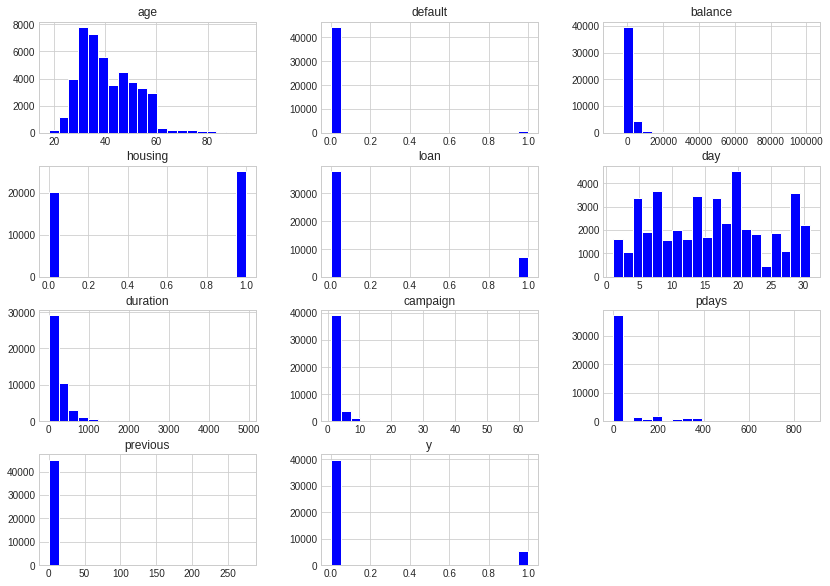

In [27]:
import matplotlib.pyplot as plt # plotting

plt.style.use('seaborn-whitegrid')


df_classification.hist(bins=20, figsize=(14,10), color='blue')
plt.show()


#### 2. Target variable - 'y'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

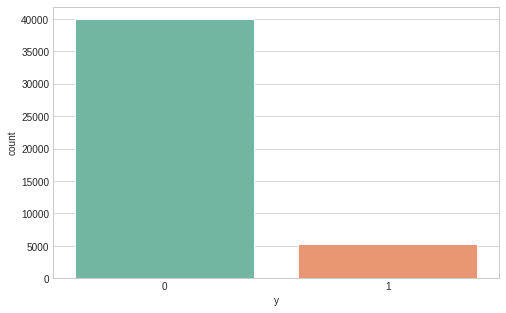

In [28]:
data_dist_y = plt.figure(figsize=(8,5))
sns.countplot(df_classification['y'], palette='Set2')

In [29]:
# Counting the percentage of people belonging to the each class
df_classification['y'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

From the above analysis we can see that the bank dataset we are dealing with is an imbalanced dataset. The number of people who have subscribed to the term deposit (12%) are way less than the number of people who have not subscribed for the term deposit (88%). 

#### 2. Target variable - 'y' and 'age'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


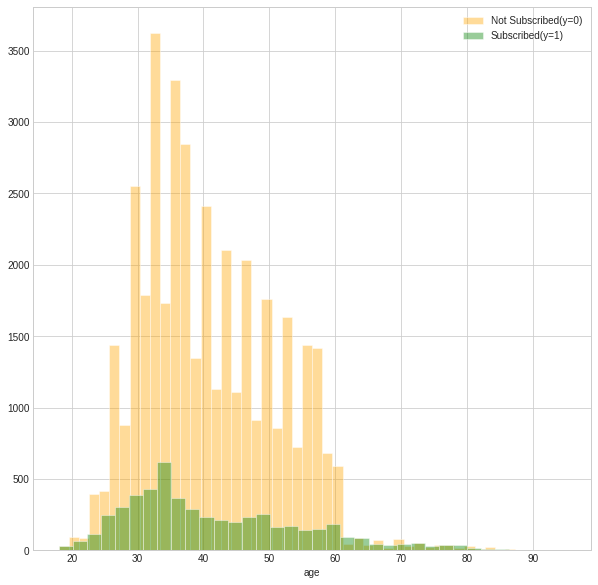

In [30]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_classification[df_classification['y']==0]['age'],color='orange',label='Not Subscribed(y=0)',kde=False)
sns.distplot(df_classification[df_classification['y']==1]['age'],color='green',label='Subscribed(y=1)',kde=False)
plt.legend()

We can see from the above analysis that, maximum number of people who have subscribed for the term deposits are mainly between the age 30-40.

#### 2. Target variable - 'y' and 'job'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

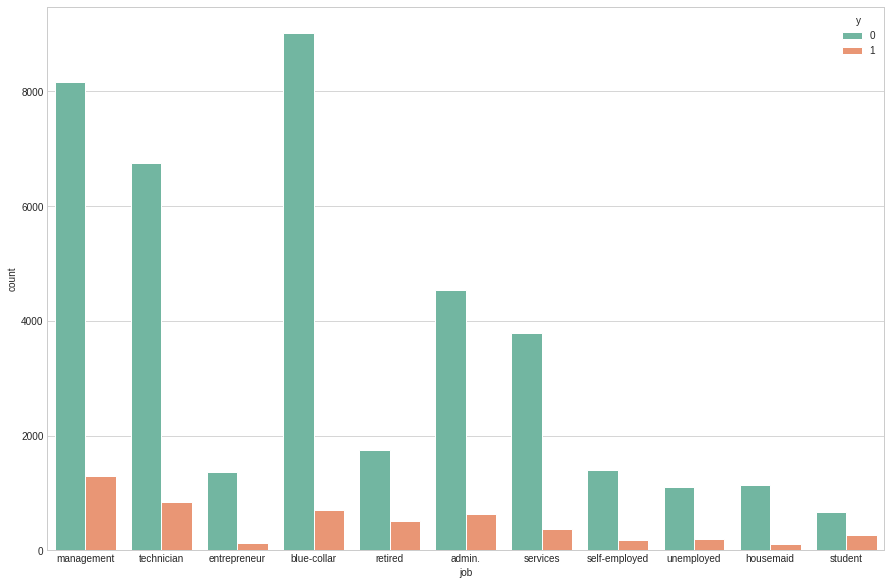

In [31]:
fig = plt.figure(figsize=(15,10))
sns.countplot(df_classification['job'],hue=df_classification['y'],palette='Set2')

From the above analysis, we can see most of the people with jobs like, management, technician, blue-collar and admin are more involved in term deposit than people in other jobs.

#### 3. Target variable - 'y' and 'marital'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

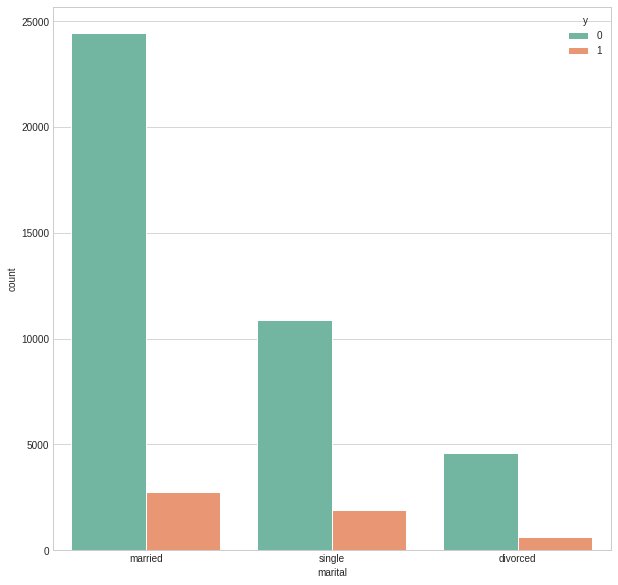

In [32]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df_classification['marital'],hue=df_classification['y'],palette='Set2')

From the above analysis, we see that married people have subscribed to the term deposit more than single and divorced. 

#### 4. Target variable - 'y' and 'education'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

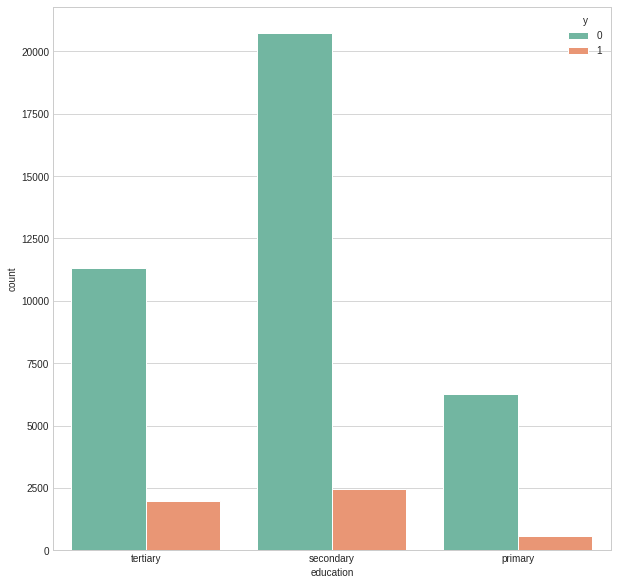

In [33]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df_classification['education'],hue=df_classification['y'],palette='Set2')

We can see from the analysis above, that people with secondary education are more likely to subscribe to the term deposit.

#### 5. Target variable - 'y' and 'default'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

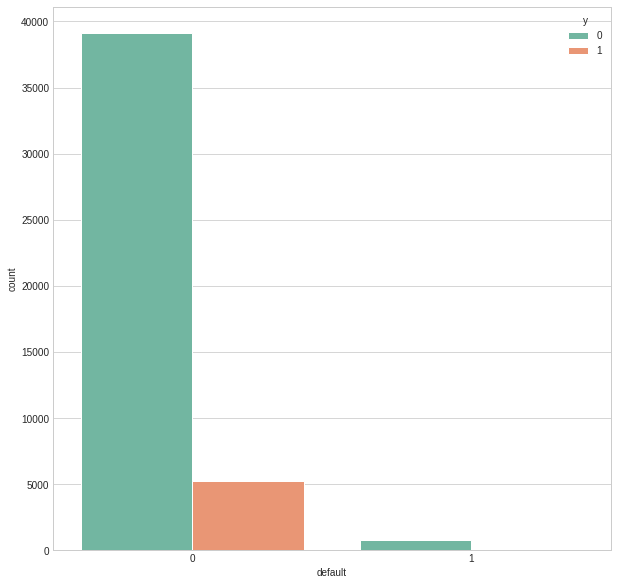

In [34]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df_classification['default'],hue=df_classification['y'],palette='Set2')

From the above analysis, we see that more people with no credit default are likely to subscribe to the term deposit.

#### 6. Target variable - 'y' and 'loan'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

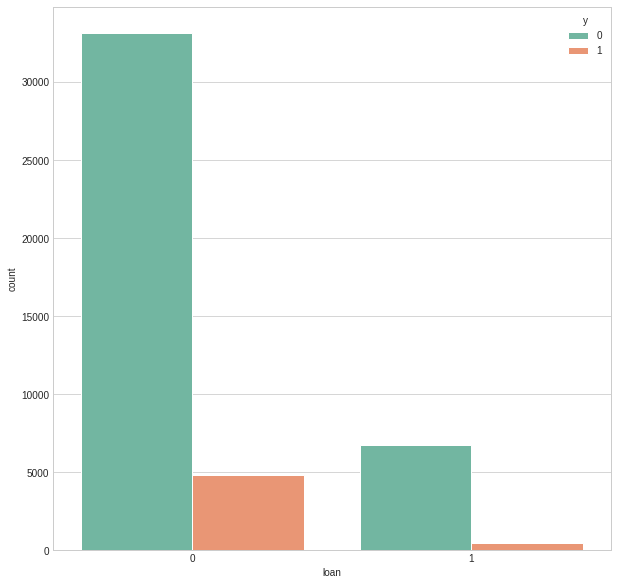

In [35]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df_classification['loan'],hue=df_classification['y'],palette='Set2')

From the above analysis, we see that more people who do not have a loan are more likely to subscribe to the term deposit.

#### 7. Target variable - 'y' and 'contact'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

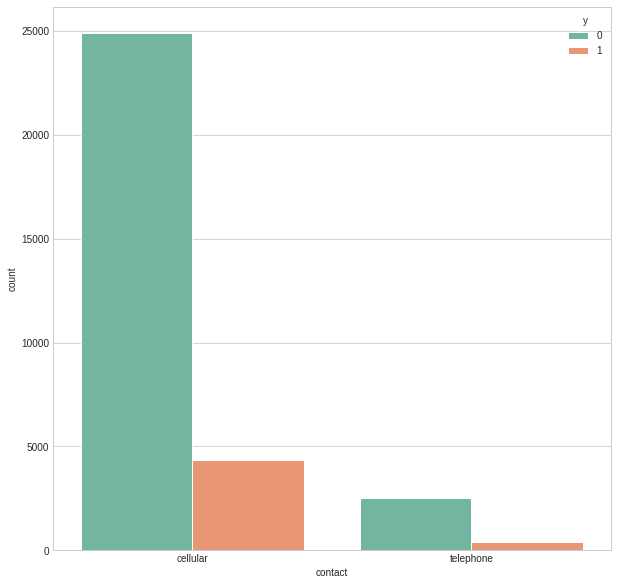

In [36]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df_classification['contact'],hue=df_classification['y'],palette='Set2')

From the above analysis, we see that more people who have a celular network are more likely to subscribe to the term deposit.

#### 8. Target variable - 'y' and 'housing'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

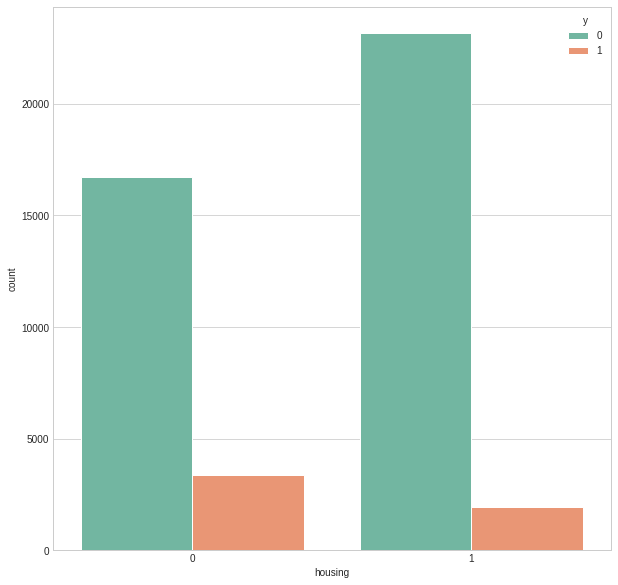

In [37]:
fig = plt.figure(figsize=(10,10))
sns.countplot(df_classification['housing'],hue=df_classification['y'],palette='Set2')

From the above analysis, we see that more people with housing loan are likely to subscribe to the term deposit.

#### 9. Target variable - 'y' and 'balance'

<AxesSubplot:xlabel='y', ylabel='balance'>

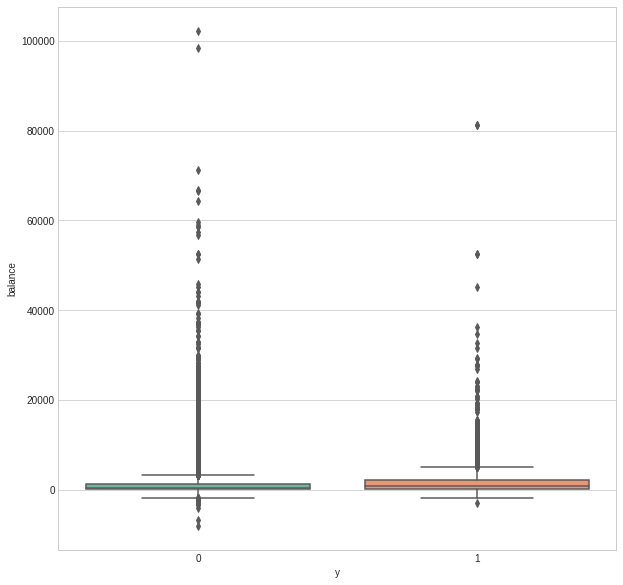

In [38]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x=df_classification['y'] , y=df_classification['balance'],palette='Set2')

From the above boxplot, we see that, more people with higher balance in their accounts are likely to subscribe to the term deposit.

#### 10. Target variable - 'y' and 'day'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

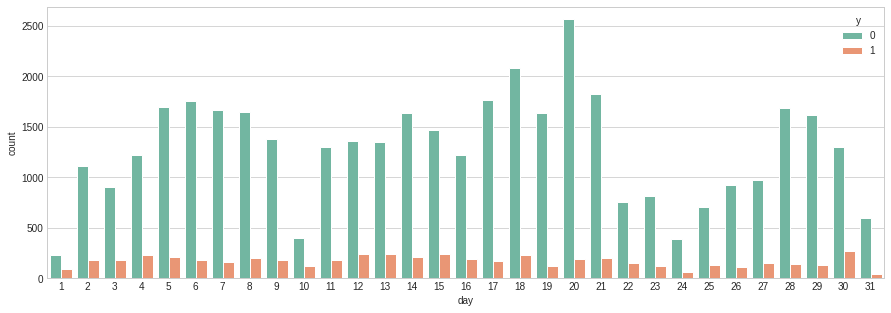

In [39]:
fig = plt.figure(figsize=(15,5))
sns.countplot(df_classification['day'],hue=df_classification['y'],palette='Set2')

From the above analysis, no specific relation can be seen between the last contact day of the month and whether people have subscribed to the term deposit or not. 

#### 11. Target variable - 'y' and 'month'

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

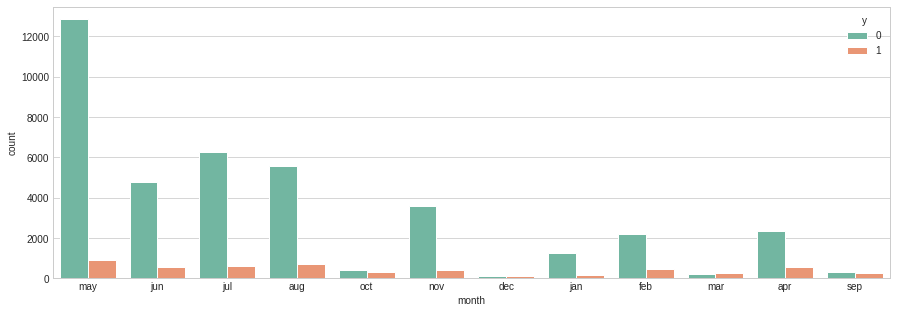

In [40]:
fig = plt.figure(figsize=(15,5))
sns.countplot(df_classification['month'],hue=df_classification['y'],palette='Set2')

From the above analysis, we can see that, people were more actively subsribing to the term deposit in the middle of the year rather than the start or end of the year.

#### 12. Target variable - 'y' and 'duration'

<AxesSubplot:xlabel='y', ylabel='duration'>

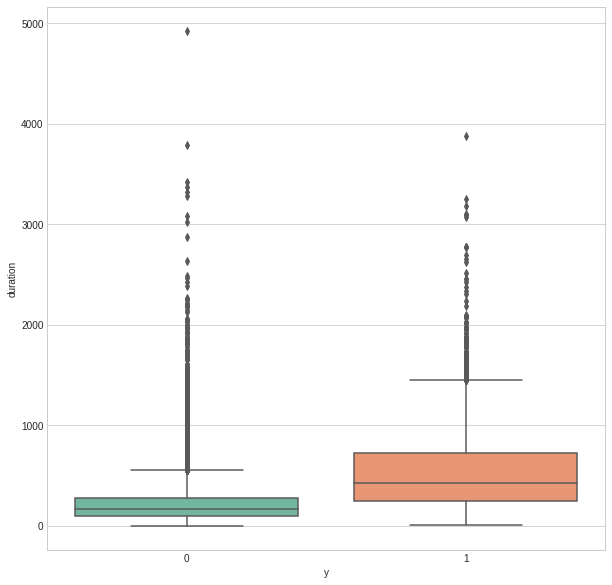

In [41]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x=df_classification['y'] , y=df_classification['duration'],palette='Set2')

From the above analysis, we see that, people who have their contact for longer duration are more likely to subscribe to the term deposit.

## Cleaning the data (encoding variables)

In [42]:
# checking number of null values in the dataset
df_classification.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

#### 1. Considering variable 'job'

In [43]:
# checking the value count of variable job
df_classification['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

##### Replacing the np.nan values in variable 'job' with the mode

In [44]:
df_classification['job'] = df_classification['job'].fillna(df_classification['job'].mode()[0])

In [45]:
# checking again the value count of variable job
df_classification['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

We can see that np.nan values have been replaced by 'bluecollar'(mode) now.

#### 2. Considering variable 'education'

In [46]:
# checking the value count of variable education
df_classification['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

##### Replacing the np.nan values in variable 'education' with the mode

In [47]:
df_classification['education'] = df_classification['education'].fillna(df_classification['education'].mode()[0])

In [48]:
# checking again the value count of variable education
df_classification['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

We can see that np.nan values have been replaced by 'secondary'(mode) now.

#### 3. Considering variable 'contact'

In [49]:
# checking the value count of variable contact
df_classification['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

##### Replacing the np.nan values in variable 'contact' with the mode

In [50]:
df_classification['contact'] = df_classification['contact'].fillna(df_classification['contact'].mode()[0])

In [51]:
# checking again the value count of variable contact
df_classification['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

We can see that np.nan values have been replaced by 'cellular'(mode) now.

#### 4. Considering variable 'poutcome'

In [52]:
# checking the value count of variable poutcome
df_classification['poutcome'].value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

We can see that more than 80% values are missing in poutcome column. Thus, we can drop this column.

##### Dropping variable 'poutcome'

In [53]:
df_classification = df_classification.drop('poutcome', axis=1)
df_classification.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0


#### 5. Considering variable 'job'

In [54]:
# checking unique values in 'job' variable
df_classification['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [55]:
# checking the value counts of 'job' variable
df_classification['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

##### Converting 'job' variable into one-hot encoded variables

In [56]:
cols = pd.get_dummies(df_classification['job'], prefix = 'job_')
df_classification[cols.columns] = cols
df_classification.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0


##### Dropping column 'job'

In [57]:
# dropping column 'job'
df_classification.drop('job', axis = 1, inplace=True)
df_classification.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed
0,58,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,44,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,33,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,47,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,33,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0


#### 5. Considering variable 'marital'

In [58]:
# checking unique values in 'marital' variable
df_classification['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [59]:
# checking the value counts of 'job' variable
df_classification['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

##### Converting 'marital' variable into one-hot encoded variables

In [60]:
cols = pd.get_dummies(df_classification['marital'], prefix = 'marital_')
df_classification[cols.columns] = cols
df_classification.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single
0,58,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,44,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,33,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,47,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,33,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


##### Dropping column 'marital'

In [61]:
# dropping column 'marital'
df_classification.drop('marital', axis = 1, inplace=True)
df_classification.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single
0,58,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,44,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,33,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,47,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,33,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


#### 6. Considering variable 'education'

In [62]:
# checking unique values in 'education' variable
df_classification['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [63]:
# checking the value counts of 'education' variable
df_classification['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

##### Converting 'education' variable into one-hot encoded variables

In [64]:
cols = pd.get_dummies(df_classification['education'], prefix = 'education_')
df_classification[cols.columns] = cols
df_classification.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary
0,58,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,44,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,33,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,47,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,33,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


##### Dropping column 'education'

In [65]:
# dropping column 'education'
df_classification.drop('education', axis = 1, inplace=True)
df_classification.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary
0,58,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,33,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,47,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,33,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


#### 7. Considering variable 'contact'

In [66]:
# checking unique values in 'contact' variable
df_classification['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [67]:
# checking the value counts of 'contact' variable
df_classification['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

##### Converting 'contact' variable into one-hot encoded variables

In [68]:
cols = pd.get_dummies(df_classification['contact'], prefix = 'contact_')
df_classification[cols.columns] = cols
df_classification.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone
0,58,0,2143,1,0,cellular,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,cellular,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,cellular,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,cellular,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,cellular,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


##### Dropping column 'contact'

In [69]:
df_classification.drop('contact', axis = 1, inplace=True)
df_classification.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


#### 8. Considering variable 'month'

In [70]:
# checking unique values in 'month' variable
df_classification['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [71]:
# checking the value counts of 'month' variable
df_classification['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

##### Converting 'month' variable into one-hot encoded variables

In [72]:
cols = pd.get_dummies(df_classification['month'], prefix = 'month_')
df_classification[cols.columns] = cols
df_classification.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


##### Dropping column 'month'

In [73]:
df_classification.drop('month', axis = 1, inplace=True)
df_classification.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
# checking the total column information for the dataframe
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   45211 non-null  int64
 1   default               45211 non-null  int64
 2   balance               45211 non-null  int64
 3   housing               45211 non-null  int64
 4   loan                  45211 non-null  int64
 5   day                   45211 non-null  int64
 6   duration              45211 non-null  int64
 7   campaign              45211 non-null  int64
 8   pdays                 45211 non-null  int64
 9   previous              45211 non-null  int64
 10  y                     45211 non-null  int64
 11  job__admin.           45211 non-null  uint8
 12  job__blue-collar      45211 non-null  uint8
 13  job__entrepreneur     45211 non-null  uint8
 14  job__housemaid        45211 non-null  uint8
 15  job__management       45211 non-null  uint8
 16  job_

## Separating Target variable with other features

In [75]:
X = df_classification.drop(columns = ['y'])
Y = df_classification['y']

In [76]:
# printing all the features except the target column 'y' 
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Splitting the dataset into train and test

We are splitting the dataset into 75% train and 25% test

In [77]:
# splitting into train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [78]:
# checking the shape of train and test
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print('Y_test shape: ',Y_test.shape)

X_train shape:  (33908, 41)
X_test shape:  (11303, 41)
Y_train shape:  (33908,)
Y_test shape:  (11303,)


## Applying Data Scaling

As we saw earlier during the data distribution of the variables, that it is highly skewed. Thus we can apply min max scaling here. We sould apply standard scaling on the dataset if the variables were normally distributed as it normalizes the variable with mean 0 and SD 1.

In [79]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [80]:
# Converting to dataframe
X_train_scale = pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_sc,columns=X_test.columns)

In [81]:
# printing the scaled train dataframe
X_train_scale.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep
0,0.272727,0.0,0.107939,1.0,0.0,0.633333,0.014640,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.168831,0.0,0.082545,1.0,0.0,0.933333,0.016673,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.080847,1.0,1.0,0.433333,0.073607,0.080645,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.012987,0.0,0.076380,0.0,0.0,0.133333,0.066490,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.350649,0.0,0.072803,0.0,0.0,0.266667,0.020333,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# printing the scaled test dataframe
X_test_scale.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,contact__cellular,contact__telephone,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep
0,0.246753,0.0,0.085541,1.0,0.0,0.300000,0.018503,0.225806,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.233766,0.0,0.070506,1.0,0.0,0.433333,0.218178,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.376623,0.0,0.069117,0.0,1.0,0.233333,0.049410,0.064516,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.506494,0.0,0.077352,1.0,1.0,0.333333,0.021350,0.096774,0.216743,0.007273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.194805,1.0,0.069117,1.0,1.0,0.433333,0.067507,0.016129,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# checking shape for scaled train dataframe
X_train_scale.shape

(33908, 41)

In [84]:
# checking shape for scaled test dataframe
X_test_scale.shape

(11303, 41)

## Data Sampling

In [85]:
np.random.seed(0)
sample_train = np.random.randint(0,33908,4000)
sample_test = np.random.randint(0,11303,1000)

In [86]:
X_train_scale = X_train_scale.iloc[sample_train,:]

In [87]:
Y_train = Y_train.iloc[sample_train,]

In [88]:
X_test_scale = X_test_scale.iloc[sample_test,:]

In [89]:
Y_test = Y_test.iloc[sample_test,]

In [90]:
# now checking the shape of scaled train
X_train_scale.shape

(4000, 41)

In [91]:
# now checking the shape of scaled train
Y_train.shape

(4000,)

In [92]:
# now checking the shape of scaled test
X_test_scale.shape

(1000, 41)

In [93]:
# now checking the shape of scaled test
Y_test.shape

(1000,)

### Target Value 'y' distribution

#### 1. Y_train distribution

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

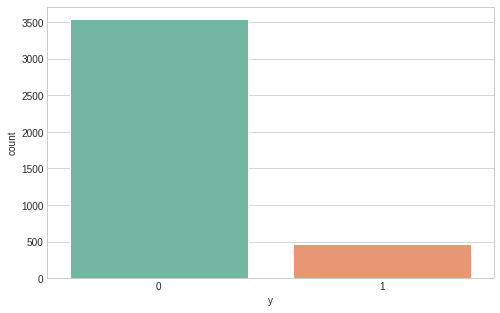

In [94]:
data_dist_y = plt.figure(figsize=(8,5))
sns.countplot(Y_train, palette='Set2')

#### Y_test distribution

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

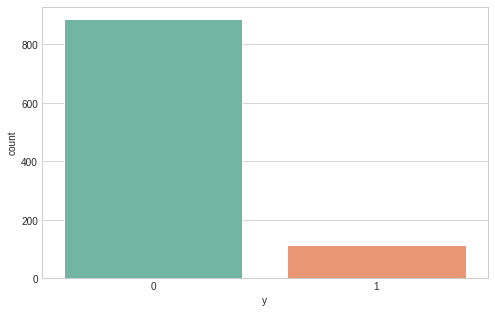

In [95]:
data_dist_y = plt.figure(figsize=(8,5))
sns.countplot(Y_test, palette='Set2')

As we can now see from the above distributions, their is an imbalance in the distribution of classes and number of negative label (0) is way greater than the number of positive labels (1). Generally in the classification datasets when imbalance is encountered, F1 score is a better metric than accuracy. Therefore, we will be applying scoring='f1' (f1 scoring) in grid search cross validation. Also as the goal of our project is to minimize the false positives, F1 score will help in balancing the precision and recall.

## Applying Classification Models

## Dummy Classifier

In [96]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train_scale, Y_train)

pred_most_frequent = dummy_majority.predict(X_test_scale)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test_scale, Y_test)))
print(metrics.classification_report(Y_test,pred_most_frequent))

Unique predicted labels: [0]
Test score: 0.89
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       885
           1       0.00      0.00      0.00       115

    accuracy                           0.89      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.89      0.83      1000



/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

## 1. K - Nearest Neighbor Classification with Grid Search and Cross Validation

In [97]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k, n_jobs = jobs)
    knn.fit(X_train_scale, Y_train)
    train_score_array.append(knn.score(X_train_scale, Y_train))
    test_score_array.append(knn.score(X_test_scale, Y_test))

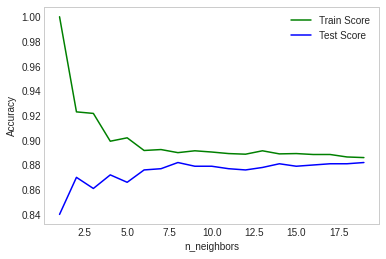

In [98]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

### Applying GridSearchCV with Cross Validation

In [99]:
kfold = KFold(n_splits=5)

In [100]:
knn = KNeighborsClassifier(n_jobs = jobs)
num = list(range(1,20))
grid_params = {'n_neighbors': num}
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_knn = GridSearchCV(knn,grid_params,cv=kfold,return_train_score=True,scoring=f1_scorer, n_jobs = jobs)
grid_knn.fit(X_train_scale,Y_train)
Y_pred = grid_knn.predict(X_test_scale)

# print the output of the model accuracy and best chosen parameters
print("Best Accuracy Score: {0:.4f}".format(grid_knn.best_score_))
print("Parameters selected by best kNN model:", grid_knn.best_estimator_)
print("Best parameters selected by best kNN model:", grid_knn.best_params_)

Best Accuracy Score: 0.3528
Parameters selected by best kNN model: KNeighborsClassifier(n_jobs=10, n_neighbors=1)
Best parameters selected by best kNN model: {'n_neighbors': 1}


So from the above knn model, we get the best accuracy score as 0.3528. Also after applying grid search and 5 fold cross validation, we get the best model at n_neighbors=1.

In [101]:
results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009574,0.011360,0.102472,0.058842,1,{'n_neighbors': 1},0.294872,0.349398,0.348387,0.366492,0.405063,0.352842,0.035512,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.010766,0.004769,0.166760,0.036860,2,{'n_neighbors': 2},0.099010,0.157895,0.208333,0.115702,0.137931,0.143774,0.037930,6,0.481781,0.479508,0.491228,0.467368,0.425163,0.469010,0.023205
2,0.010122,0.006625,0.235245,0.041477,3,{'n_neighbors': 3},0.229508,0.257143,0.254545,0.198582,0.225564,0.233068,0.021444,2,0.539964,0.547038,0.542429,0.546448,0.513966,0.537969,0.012281
3,0.008731,0.004256,0.135720,0.042037,4,{'n_neighbors': 4},0.079208,0.129630,0.136364,0.084034,0.163934,0.118634,0.032370,10,0.251121,0.247140,0.278970,0.297968,0.249423,0.264924,0.020181
4,0.006907,0.002792,0.184252,0.082192,5,{'n_neighbors': 5},0.144144,0.172414,0.202020,0.220588,0.184615,0.184756,0.026014,3,0.340081,0.331915,0.372361,0.369610,0.336798,0.350153,0.017229


In [102]:
results_knn.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'], dtype='object')

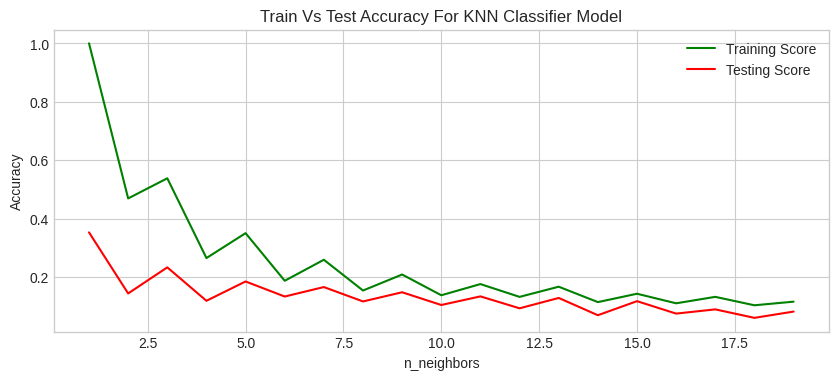

In [103]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(results_knn['param_n_neighbors'],results_knn['mean_train_score'],color='green',label='Training Score')
plt.plot(results_knn['param_n_neighbors'],results_knn['mean_test_score'],color='red',label='Testing Score')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For KNN Classifier Model')
plt.legend()

From the above plot we see that, the best performance of the knn model is when n_neighbors=1.

In [104]:
# finding the accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred,pos_label=1)
rec = recall_score(Y_test, Y_pred, pos_label=1)
f1 = f1_score(Y_test, Y_pred,pos_label=1)

knn_result = pd.DataFrame([['KNN_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = knn_result

# printing the output in the table manner
print(knn_result)

         Model Accuracy Precision Recall f1_Score
0  KNN_Grid_CV    0.840     0.241  0.183    0.208


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

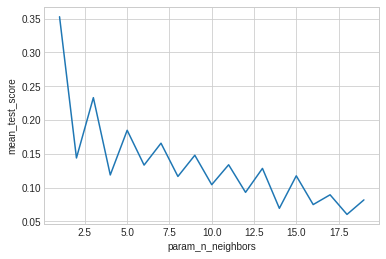

In [105]:
# plotting avg test score v/s number of neighbors
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=pd.DataFrame(grid_knn.cv_results_))

From the above graph we see the plot between the test accuracy and the number of neighbors. We clearly see that test sccuracy score is the maximum for n_neighbors=1 and the we got the best KNN model. After n_neighbors=1, the test accuracy is decreasing.

### Checking the score on best parameter for KNN Model

In [106]:
knn1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = jobs)
knn1.fit(X_train_scale,Y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=1)

In [107]:
cross_val_score_knn = cross_val_score(knn1,X_train_scale,Y_train,cv=kfold,scoring=f1_scorer,n_jobs = jobs)
cross_val_knn_mean = cross_val_score_knn.mean()

### Plotting ROC Curve

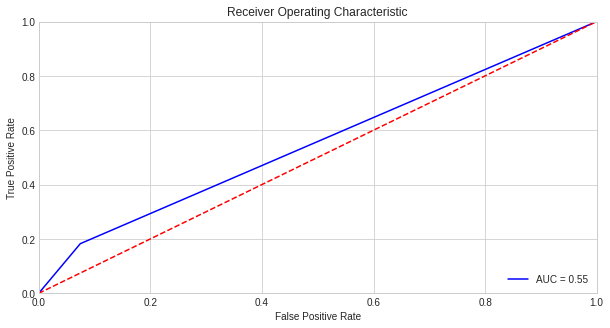

In [108]:
import sklearn.metrics as metrics

probs = knn1.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


From the above ROC Curve we see that, the AUC of the best KNN model is 0.55

In [109]:
print('The best accuracy test score with the best parameter of KNN model and value of n_neighbor : 1 is: {} '.format(round(cross_val_knn_mean,4)))

The best accuracy test score with the best parameter of KNN model and value of n_neighbor : 1 is: 0.3528 


## 2. Logistic Regression Model with Grid Search and Cross Validation

In [110]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear',n_jobs = jobs)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs',n_jobs = jobs)
    log_l1.fit(X_train_scale, Y_train)
    log_l2.fit(X_train_scale, Y_train)
    train_score_l1.append(log_l1.score(X_train_scale, Y_train))
    train_score_l2.append(log_l2.score(X_train_scale, Y_train))
    test_score_l1.append(log_l1.score(X_test_scale, Y_test))
    test_score_l2.append(log_l2.score(X_test_scale, Y_test))

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.p

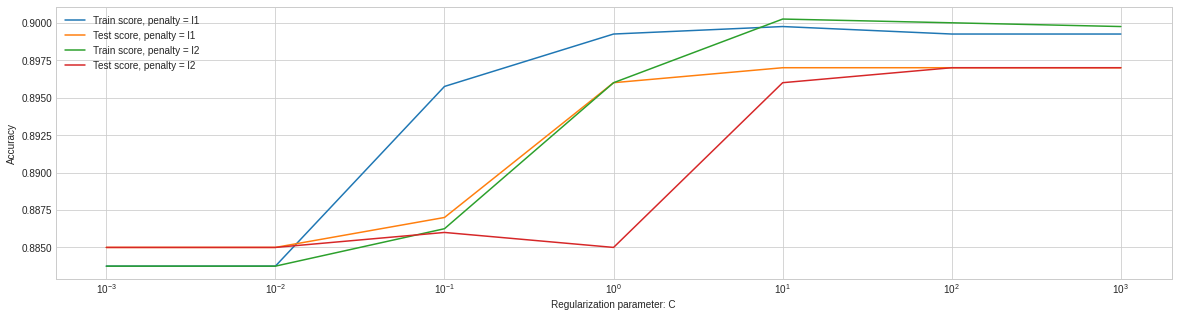

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [112]:
logreg = LogisticRegression(random_state = 0)
grid_params = {'penalty':['l1','l2'],
               'solver' : ['liblinear','lbfgs'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_logreg = GridSearchCV(logreg,grid_params,cv=kfold,return_train_score=True,scoring=f1_scorer,n_jobs = jobs)

# Fit grid search
logreg_model = grid_logreg.fit(X_train_scale, Y_train)
Y_pred1 = logreg_model.predict(X_test_scale)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_logreg.best_score_))
print("Parameters selected by best Log_Regression model:", grid_logreg.best_estimator_)
print("Best parameter for logistic regression model:", grid_logreg.best_params_)

Best Score: 0.4259
Parameters selected by best Log_Regression model: LogisticRegression(C=100, random_state=0)
Best parameter for logistic regression model: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.                nan 0.         0.         0.                nan
 0.         0.         0.14745899        nan 0.03467252 0.02595055
 0.41059655        nan 0.24788773 0.25089049 0.4230066         nan
 0.40335619 0.40259989 0.42314361        nan 0.42531218 0.42589707
 0.42314361        nan 0.42314361 0.42099647]
  warnings.warn(
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.                nan 0.         0.         0.                nan
 0.         0.         0.15455729        nan 0.03257679 0.02425361
 0.40688179        nan 0.27640888 0.27536891 0.43127953        nan
 0.40880646 0.4083977  0.43463312        nan 0.433033   0.43215431
 0.43468883        nan 0.436

From the above analysis we see that, the train score is 0.4259. The best parameter found is 'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'.

In [113]:
log_results = pd.DataFrame(grid_logreg.cv_results_)
log_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008920,0.001759,0.003711,0.000904,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001201,0.000434,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.006410,0.000487,0.002417,0.000236,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006690,0.000907,0.002341,0.000356,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.008038,0.001855,0.003287,0.001110,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
log_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'], dtype='object')

Text(0.5, 1.0, 'Displaying The Test Score for the Range of cost function C And For Different Norms')

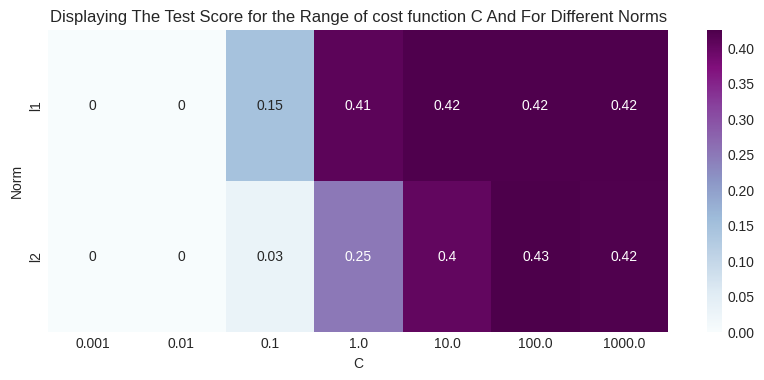

In [115]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(log_results.pivot_table(index='param_penalty',columns='param_C',values='mean_test_score'),cmap='BuPu',annot=True)
plt.xlabel('C')
plt.ylabel('Norm')
plt.title('Displaying The Test Score for the Range of cost function C And For Different Norms')

From the above heatmap we see that, the maximum test accuracy is obtained when logistic regression model is used with the cost functions, C=100 and Norm = l2.

### Finding accuracy, precision, recall and f1 score

In [116]:
# Finding metrics like accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred1)
prec = precision_score(Y_test, Y_pred1,pos_label=1)
rec = recall_score(Y_test, Y_pred1, pos_label=1)
f1 = f1_score(Y_test, Y_pred1,pos_label=1)

logreg_result_df = pd.DataFrame([['Log_Reg_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = Result_all.append(logreg_result_df, ignore_index = True)

# printing the output in the table manner
print(logreg_result_df)
#print(Result_all)

             Model Accuracy Precision Recall f1_Score
0  Log_Reg_Grid_CV    0.898     0.600  0.339    0.433


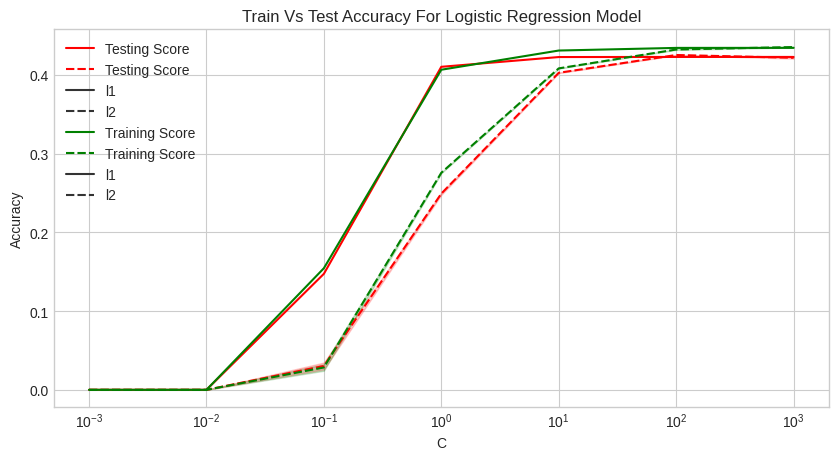

In [117]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(x= log_results['param_C'],y= log_results['mean_test_score'],
style=log_results['param_penalty'],color='red',label='Testing Score')

sns.lineplot(x= log_results['param_C'],y= log_results['mean_train_score'],
             style=log_results['param_penalty'],color='green',label='Training Score')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For Logistic Regression Model')
plt.legend()

From the above analysis we see that, for C = 1000 and l2 regularization, the logistic regression model gives the best test accuracy score of 0.8876.  

### Checking the score on best parameter for Logistic Regression Model

In [118]:
logreg_1 = LogisticRegression(penalty='l2',C=100,solver='lbfgs',n_jobs = jobs)
logreg_1.fit(X_train_scale,Y_train)
cross_val_score_logreg_1 = cross_val_score(logreg_1,X_train_scale,Y_train,cv=kfold,scoring=f1_scorer)
cross_val_logreg_1_mean = cross_val_score_logreg_1.mean()

#### Plotting ROC Curve

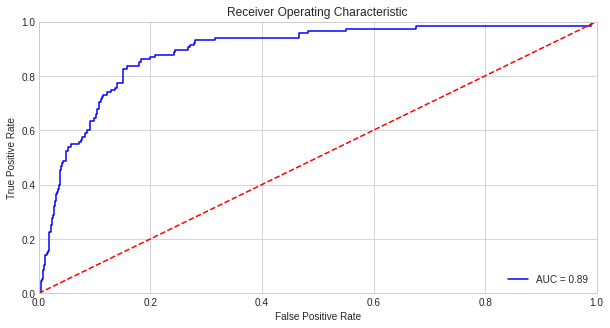

In [119]:
probs = logreg_1.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)



fig=plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From the above ROC curve, we get the AUC of 0.89

In [120]:
print('The best test accuracy score with the Logistic Regression Model with the value of C=100 and having l2 regularization is: {}'.format(round(cross_val_logreg_1_mean,4)))

The best test accuracy score with the Logistic Regression Model with the value of C=100 and having l2 regularization is: 0.4259


## 3. Linear Support Vector Machines with Grid search & Cross-Validation

In [121]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train_scale,Y_train)

# Create hyperparameter tuning values
grid_params1 = {'C': [0.001,0.01,0.1,1,10,100,1000],
               'penalty':['l1','l2']}  

# Create grid search using 5-fold cross validation
grid_linearsvc = GridSearchCV(linear_svc,grid_params1,cv=kfold,return_train_score=True,scoring=f1_scorer,n_jobs = jobs)


# Fit the model for grid search 
linearsvc_model = grid_linearsvc.fit(X_train_scale,Y_train)
Y_pred2 = linearsvc_model.predict(X_test_scale)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_linearsvc.best_score_))
print("Parameters selected by Linear SVC model:", grid_linearsvc.best_estimator_)
print("Best parameters for the model are: ", grid_linearsvc.best_params_)

Best Score: 0.3826
Parameters selected by Linear SVC model: LinearSVC(C=10, dual=False, penalty='l1')
Best parameters for the model are:  {'C': 10, 'penalty': 'l1'}


/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


From the above LinearSVC model we see that, the training score is 0.3810. The best parameters selected by the LinearSVC model are {'C': 10, 'penalty': 'l2'}.

In [122]:
# results_linear_svm = pd.DataFrame(grid.cv_results_)
logresults_linearsvc = pd.DataFrame(grid_linearsvc.cv_results_)

In [123]:
logresults_linearsvc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004657,0.000683,0.002302,0.000365,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006267,0.000786,0.002728,0.000273,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.012490,0.001785,0.002879,0.000704,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.008652,0.000503,0.002338,0.000396,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.021978,0.000000,0.000000,0.000000,0.000000,0.004396,0.008791,11,0.005319,0.010724,0.010283,0.005479,0.000000,0.006361,0.003918
4,0.081721,0.010280,0.002346,0.000346,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.252101,0.352941,0.313725,0.290323,0.260163,0.293851,0.036816,9,0.343558,0.295652,0.302905,0.316703,0.291304,0.310024,0.018851


Text(0.5, 1.0, 'Displaying The Test Score for the Range of cost function C And For Different Norms')

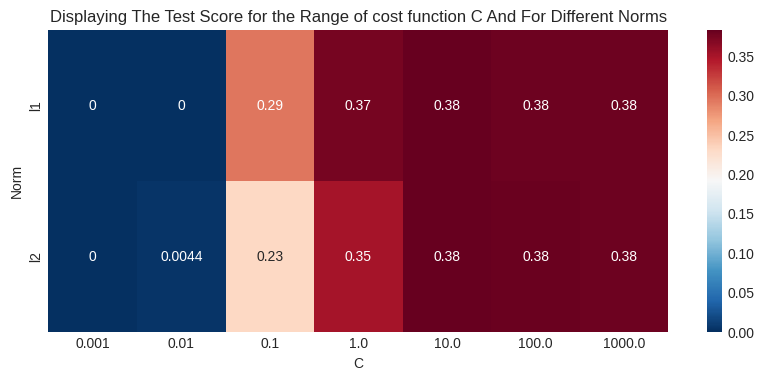

In [124]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(logresults_linearsvc.pivot_table(index='param_penalty',columns='param_C',values='mean_test_score'),cmap='RdBu_r',annot=True)
plt.xlabel('C')
plt.ylabel('Norm')
plt.title('Displaying The Test Score for the Range of cost function C And For Different Norms')

From the above analysis we see that the best score can be obtained when the test score with the Linear SVM model is used with the Cost function (C) = 10 and Norm = l2.

### Finding accuracy, precision, recall and f1 score

In [125]:
# Finding the accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred2)
prec = precision_score(Y_test, Y_pred2, pos_label=1)
rec = recall_score(Y_test, Y_pred2, pos_label=1)
f1 = f1_score(Y_test, Y_pred2, pos_label=1)

result_linear_svc = pd.DataFrame([['Linear_SVC_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = logresults_linearsvc.append(result_linear_svc, ignore_index = True)

# printing the output in the table manner
print(result_linear_svc)

                Model Accuracy Precision Recall f1_Score
0  Linear_SVC_Grid_CV    0.897     0.615  0.278    0.383


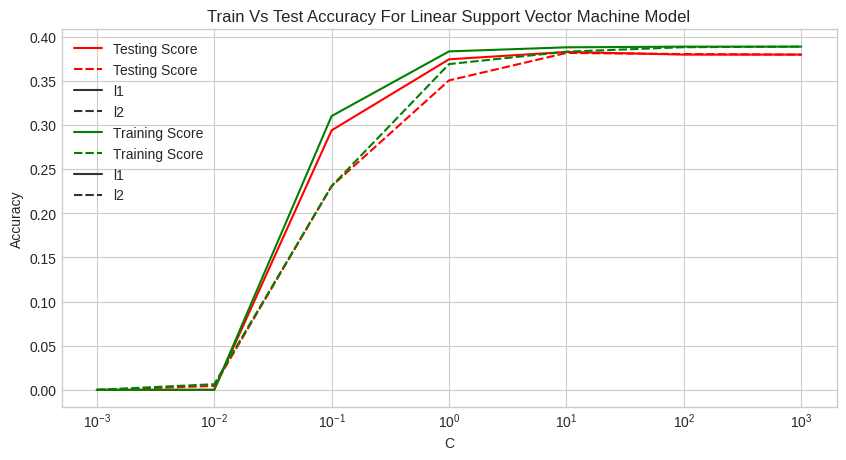

In [126]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(x= logresults_linearsvc['param_C'],y= logresults_linearsvc['mean_test_score'],
style=logresults_linearsvc['param_penalty'],color='red',label='Testing Score')

sns.lineplot(x= logresults_linearsvc['param_C'],y= logresults_linearsvc['mean_train_score'],
             style=logresults_linearsvc['param_penalty'],color='green',label='Training Score')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For Linear Support Vector Machine Model')
plt.legend()

From the above analysis, we see that the best testing score is obtained when the LinearSVM model is used with The Cost Fuction(C) = 1 and the Norm is used.

### Checking the score on best parameter for Linear SVM Model

In [127]:
linear_svc = LinearSVC(penalty='l2',C=10,dual=False)
linear_svc.fit(X_train_scale,Y_train)

LinearSVC(C=10, dual=False)

In [128]:
linear_svc_crossval_score = cross_val_score(linear_svc,X_train_scale,Y_train,cv=kfold,scoring=f1_scorer)
mean_crossval_linearsvm = linear_svc_crossval_score.mean()

### Plotting ROC Curve

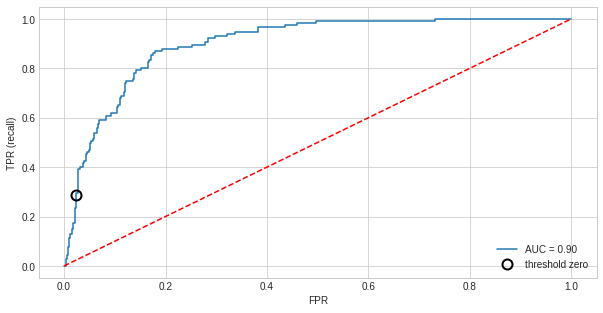

In [129]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, linear_svc.decision_function(X_test_scale))
roc_auc = metrics.auc(fpr, tpr)

fig=plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)

From the above ROC Curve, the AUC is 0.90

In [130]:
print('The best score with the Linear SVM Model with the value of C=10 and having l1 regularization is: {} '.format(round(mean_crossval_linearsvm,4)))

The best score with the Linear SVM Model with the value of C=10 and having l1 regularization is: 0.3815 


## 4. Kerenilzed Support Vector Machine

### 4.A. Support Vector Machine with Linear Kernel

In [131]:
linear_kernel_svc = SVC()
linear_kernel_svc.fit(X_train_scale,Y_train)

# Create hyperparameter tuning values for C and gamma keeping kernel as a linear 
grid_params_lin = {'C':[0.001,0.01,0.1,1,10,100,1000],
              'gamma' :[0.001,0.01,0.1,1,10,100,1000],
              'kernel' :['linear']}

# Create grid search using 5-fold cross validation
grid_svc_lin = GridSearchCV(linear_kernel_svc, grid_params_lin, return_train_score=True, verbose = 3, cv = kfold, scoring=f1_scorer, n_jobs = jobs)

# Fit the model for grid search  
svm_lin_best_model = grid_svc_lin.fit(X_train_scale, Y_train) 
Y_pred3 = svm_lin_best_model.predict(X_test_scale)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_svc_lin.best_score_))
print("Parameters selected by best SVM(linear) model:", grid_svc_lin.best_estimator_)
print("Best Parameters selected by best SVM(linear) model:", grid_svc_lin.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Score: 0.3659
Parameters selected by best SVM(linear) model: SVC(C=1000, gamma=0.001, kernel='linear')
Best Parameters selected by best SVM(linear) model: {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}


From the above model we see that, the best score of the model is 0.3659. Also the best parameters identified by the grid search and 5 fold validation are 'C': 1000, 'gamma': 0.001, 'kernel': 'linear'.

In [132]:
logresults_linear_svc = pd.DataFrame(grid_svc_lin.cv_results_)
logresults_linear_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.111793,0.015547,0.026385,0.005085,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.107228,0.016280,0.026013,0.004974,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.092809,0.014530,0.022255,0.006010,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111827,0.004872,0.028447,0.000790,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.064572,0.002940,0.016516,0.001529,0.001,10,linear,"{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding accuracy, precision, recall and f1 score

In [133]:
# Finding the accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred3)
prec = precision_score(Y_test, Y_pred3, pos_label=1)
rec = recall_score(Y_test, Y_pred3, pos_label=1)
f1 = f1_score(Y_test, Y_pred3, pos_label=1)

result_linear_svc = pd.DataFrame([['SVM(Linear)_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = Result_all.append(result_linear_svc, ignore_index = True)

# printing the output in the table manner
print(result_linear_svc)

                 Model Accuracy Precision Recall f1_Score
0  SVM(Linear)_Grid_CV    0.892     0.569  0.252    0.349


### Checking the score on best parameter for Support Vector Machine with Linear Kernel

In [134]:
linear_kernel_svc = SVC(kernel='linear', C=1000, gamma=0.001)
linear_kernel_svc.fit(X_train_scale,Y_train)

SVC(C=1000, gamma=0.001, kernel='linear')

In [135]:
linear_kernel_svc_crossval_score = cross_val_score(linear_kernel_svc,X_train_scale,Y_train,cv=kfold,verbose=5,scoring=f1_scorer,n_jobs = jobs)
mean_linear_kernel_svc_crossval_score = linear_kernel_svc_crossval_score.mean()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    6.7s remaining:   10.0s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    7.9s finished


### Plotting ROC Curve

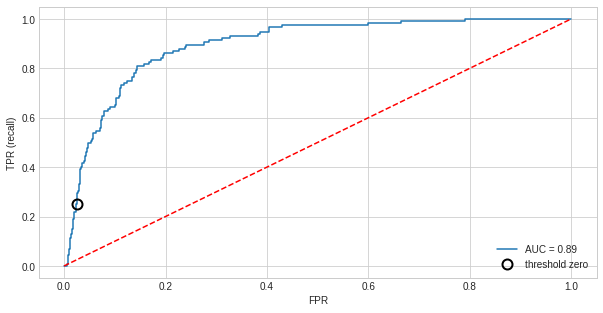

In [136]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, linear_kernel_svc.decision_function(X_test_scale))
roc_auc = metrics.auc(fpr, tpr)

fig=plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)

From the above roc plot, the AUC is 0.89

In [137]:
print('The best score with the Kernelized SVM Model with linear kernel with the value of C=1000, gamma=0.001: {} '.format(round(mean_linear_kernel_svc_crossval_score,4)))

The best score with the Kernelized SVM Model with linear kernel with the value of C=1000, gamma=0.001: 0.3659 


### 4.B. Support Vector Machine with RBF Kernel

In [138]:
rbf_kernel_svc = SVC()

# Grid search for hyperparameter tuning 
grid_params_rbf = {'C':[0.001,0.01,0.1,1,10,100,1000],
                     'gamma' :[0.001,0.01,0.1,1,10,100,1000],
                     'kernel' :['rbf']}

# Create grid search using 5-fold cross validation
grid_svc_rbf = GridSearchCV(rbf_kernel_svc, grid_params_rbf, refit = True, verbose = 3, cv = kfold,scoring=f1_scorer,return_train_score=True, n_jobs = jobs) 
  
# Fit the model for grid search 
svm_rbf_best_model = grid_svc_rbf.fit(X_train_scale, Y_train) 
Y_pred4 = svm_rbf_best_model.predict(X_test_scale)

# Print the score results and parameters for the best mode
print("Best Score: {0:.4f}".format(grid_svc_rbf.best_score_))
print("Parameters selected by best SVM(rbf) model:", grid_svc_rbf.best_estimator_)
print("Best parameters selected by best SVM(rbf) model:", grid_svc_rbf.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Score: 0.5184
Parameters selected by best SVM(rbf) model: SVC(C=1000, gamma=0.1)
Best parameters selected by best SVM(rbf) model: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


From the above analysis we see that, the best score of the model is 0.5184. Also the best parameters identified by the grid search and 5 fold validation are 'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'.

In [139]:
logresults_rbf_svc = pd.DataFrame(grid_svc_rbf.cv_results_)
logresults_rbf_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.136344,0.011809,0.048013,0.006228,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.099947,0.030878,0.036521,0.008112,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.083088,0.005503,0.035112,0.007934,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.150814,0.003415,0.053113,0.001973,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.093169,0.026518,0.038988,0.009442,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Displaying The Test Score for the Range of cost function C And For Different Gama values')

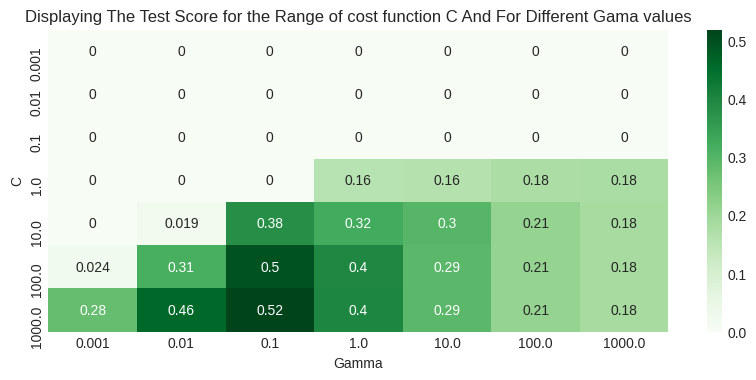

In [140]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(logresults_rbf_svc.pivot_table(index='param_C',columns='param_gamma',values='mean_test_score'),cmap='Greens',annot=True)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Displaying The Test Score for the Range of cost function C And For Different Gama values')

From the above analysis we see that, the best score can be obtained when the test score with the SVM model with rbf kernel is used with the Cost function (C) = 1000 and Gamma = 0.1.

### Finding accuracy, precision, recall and f1 score

In [141]:
# Finding the accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred4)
prec = precision_score(Y_test, Y_pred4, pos_label=1)
rec = recall_score(Y_test, Y_pred4, pos_label=1)
f1 = f1_score(Y_test, Y_pred4, pos_label=1)

result_rbf_svc = pd.DataFrame([['SVM(RBF)_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = Result_all.append(result_rbf_svc, ignore_index = True)

# printing the output in the table manner
print(result_rbf_svc)

              Model Accuracy Precision Recall f1_Score
0  SVM(RBF)_Grid_CV    0.874     0.452  0.452    0.452


### Checking the score on best parameter for Support Vector Machine with RBF Kernel

In [142]:
rbf_kernel_svc1 = SVC(kernel='rbf',C=1000,gamma=0.1)
rbf_kernel_svc1.fit(X_train_scale,Y_train)

SVC(C=1000, gamma=0.1)

In [143]:
rbf_kernel_svc_crossval_score = cross_val_score(rbf_kernel_svc1,X_train_scale,Y_train,cv=kfold,verbose=5,scoring=f1_scorer, n_jobs = jobs)
mean_rbf_kernel_svc_crossval_score = rbf_kernel_svc_crossval_score.mean()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.4s finished


### Plotting ROC Curve

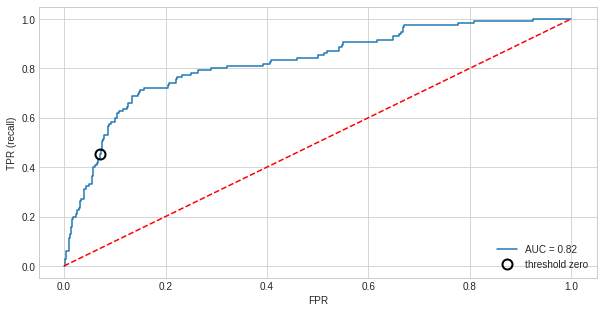

In [144]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, rbf_kernel_svc1.decision_function(X_test_scale))
roc_auc = metrics.auc(fpr, tpr)

fig=plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)

For the above ROC Curve, AUC is 0.82

In [145]:
print('The best score with the Kernelized SVM Model with rbf kernel with the value of C=1000, gamma=0.1: {} '.format(round(mean_rbf_kernel_svc_crossval_score,4)))

The best score with the Kernelized SVM Model with rbf kernel with the value of C=1000, gamma=0.1: 0.5184 


### 4.C. Support Vector Machine with Poly Kernel

In [146]:
poly_kernel_svc = SVC()
poly_kernel_svc.fit(X_train_scale,Y_train)

SVC()

In [147]:
grid_params_poly = {'gamma':[0.01,0.1,1,10],
                    'C':[0.01,0.1,1,10],
                    'degree': [1,2],
                    'kernel': ['poly']}

# Create grid search using 5-fold cross validation
grid_svc_poly = GridSearchCV(poly_kernel_svc, grid_params_poly, return_train_score=True, verbose = 3, cv = kfold,scoring=f1_scorer,n_jobs = jobs) 
  
# Fit the model for grid search
svm_poly_best_model = grid_svc_poly.fit(X_train_scale, Y_train) 
Y_pred5 = svm_poly_best_model.predict(X_test_scale)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_svc_poly.best_score_))
print("Parameters selected by best SVM(poly) model:", grid_svc_poly.best_estimator_)
print("Best parameters selected by best SVM(poly) model:", grid_svc_poly.best_estimator_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Score: 0.5137
Parameters selected by best SVM(poly) model: SVC(C=10, degree=2, gamma=10, kernel='poly')
Best parameters selected by best SVM(poly) model: SVC(C=10, degree=2, gamma=10, kernel='poly')


From the above analysis we see that, the best score of the SVM model with poly kernel is 0.5137. Also the best parameters identified by the grid search and 5 fold validation are C=10, degree=2, gamma=10, kernel='poly'.

In [148]:
logresults_poly_svc = pd.DataFrame(grid_svc_poly.cv_results_)
logresults_poly_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096699,0.016489,0.022403,0.004463,0.01,1,0.01,poly,"{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kerne...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.110873,0.020426,0.026427,0.005385,0.01,1,0.1,poly,"{'C': 0.01, 'degree': 1, 'gamma': 0.1, 'kernel...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.110278,0.016965,0.021129,0.006424,0.01,1,1,poly,"{'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.137825,0.023114,0.021586,0.005461,0.01,1,10,poly,"{'C': 0.01, 'degree': 1, 'gamma': 10, 'kernel'...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.061760,0.002625,0.015020,0.000402,0.01,2,0.01,poly,"{'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kerne...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding accuracy, precision, recall and f1 score

In [149]:
# Finding the accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred5)
prec = precision_score(Y_test, Y_pred5, pos_label=1)
rec = recall_score(Y_test, Y_pred5, pos_label=1)
f1 = f1_score(Y_test, Y_pred5, pos_label=1)

result_poly_svc = pd.DataFrame([['SVM(Poly)_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = Result_all.append(result_poly_svc, ignore_index = True)

# printing the output in the table manner
print(result_poly_svc)

               Model Accuracy Precision Recall f1_Score
0  SVM(Poly)_Grid_CV    0.877     0.470  0.539    0.502


### Checking the score on best parameter for Support Vector Machine with Poly Kernel

In [150]:
poly_kernel_svc2 = SVC(kernel='poly',C=10,degree=2,gamma=10)
poly_kernel_svc2.fit(X_train_scale,Y_train)

SVC(C=10, degree=2, gamma=10, kernel='poly')

In [151]:
poly_kernel_svc_crossval_score = cross_val_score(poly_kernel_svc2,X_train_scale,Y_train,cv=kfold,verbose=5,scoring=f1_scorer,n_jobs = jobs)
mean_poly_kernel_svc_crossval_score = poly_kernel_svc_crossval_score.mean()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.9min finished


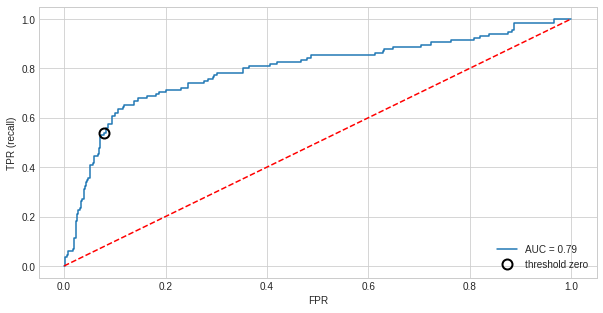

In [152]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, poly_kernel_svc2.decision_function(X_test_scale))
roc_auc = metrics.auc(fpr, tpr)

fig=plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)

From the above ROC curve, the AUC is 0.79

In [153]:
print('The best score with the Kernelized SVM Model with poly kernel with the value of C=10,gamma=10 and degree=2: {}'.format(round(mean_poly_kernel_svc_crossval_score,4)))

The best score with the Kernelized SVM Model with poly kernel with the value of C=10,gamma=10 and degree=2: 0.5137


## 4. Decision Tree Classifier

In [154]:
dec_tree = DecisionTreeClassifier(random_state = 0)
dec_tree.fit(X_train_scale, Y_train)

DecisionTreeClassifier(random_state=0)

In [155]:
# Create hyperparameter tuning values
grid_params_dec_tree = {"max_depth": [1,5,10,15,20,25,30,35,40,45,50]}

# Create grid search using 5-fold cross validation
grid_dec_tree = GridSearchCV(dec_tree, grid_params_dec_tree, return_train_score=True, verbose = 3, cv = kfold,scoring=f1_scorer, n_jobs = jobs) 
  
# Fit the model for grid search
dec_tree_best_model = grid_dec_tree.fit(X_train_scale, Y_train)
Y_pred6 = dec_tree_best_model.predict(X_test_scale) 

# Print the score results and parameters for the best model 
print("Best Score: {0:.4f}".format(grid_dec_tree.best_score_))
print("Parameters selected by best Decision Tree Classifier model:", grid_dec_tree.best_estimator_)
print("Best parameters selected by best Decision Tree Classifier model:", grid_dec_tree.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Score: 0.5051
Parameters selected by best Decision Tree Classifier model: DecisionTreeClassifier(max_depth=10, random_state=0)
Best parameters selected by best Decision Tree Classifier model: {'max_depth': 10}


From the above analysis we see that, the best score of the decision tree classifier model is 0.5051. Also the best parameter identified by the grid search and 5 fold validation is 'max_depth': 10.

In [156]:
logresults_dec_tree = pd.DataFrame(grid_dec_tree.cv_results_)
logresults_dec_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004130,0.000513,0.001908,0.000295,1,{'max_depth': 1},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010940,0.001940,0.002696,0.000392,5,{'max_depth': 5},0.437870,0.509317,0.492537,0.511364,0.562500,0.502718,0.040003,2,0.658960,0.616766,0.585949,0.591900,0.612950,0.613305,0.025702
2,0.016602,0.001909,0.002653,0.000172,10,{'max_depth': 10},0.427673,0.540541,0.543046,0.470588,0.543478,0.505065,0.047655,1,0.838150,0.863768,0.839609,0.845329,0.892805,0.855932,0.020572
3,0.019378,0.001316,0.002608,0.000443,15,{'max_depth': 15},0.397727,0.513089,0.503145,0.468085,0.510638,0.478537,0.043519,10,0.956885,0.964088,0.944966,0.957020,0.970213,0.958634,0.008441
4,0.017112,0.001280,0.001932,0.000119,20,{'max_depth': 20},0.371585,0.513089,0.518519,0.469945,0.538071,0.482242,0.059633,9,0.985155,0.997297,0.988235,0.988920,0.990264,0.989974,0.004027


### Finding accuracy, precision, recall and f1 score

In [157]:
# Finding the accuracy, precision, recall and f1 score for test data
acc = accuracy_score(Y_test, Y_pred6)
prec = precision_score(Y_test, Y_pred6, pos_label=1)
rec = recall_score(Y_test, Y_pred6, pos_label=1)
f1 = f1_score(Y_test, Y_pred6, pos_label=1)

result_dec_tree = pd.DataFrame([['Decision_Tree_Grid_CV', '{0:,.3f}'.format(acc), '{0:,.3f}'.format(prec), '{0:,.3f}'.format(rec), '{0:,.3f}'.format(f1)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
Result_all = Result_all.append(result_dec_tree, ignore_index = True)

# printing the output in the table manner
print(result_dec_tree)

                   Model Accuracy Precision Recall f1_Score
0  Decision_Tree_Grid_CV    0.903     0.585  0.539    0.561


### Checking the score on best parameter for Decision Tree Classifier

In [158]:
dec_tree1 = DecisionTreeClassifier(max_depth=10)
dec_tree1.fit(X_train_scale,Y_train)

DecisionTreeClassifier(max_depth=10)

In [159]:
dec_tree_crossval_score = cross_val_score(dec_tree1,X_train_scale,Y_train,cv=kfold,verbose=5,scoring=f1_scorer, n_jobs = jobs)
mean_dec_tree_crossval_score = dec_tree_crossval_score.mean()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.0s finished


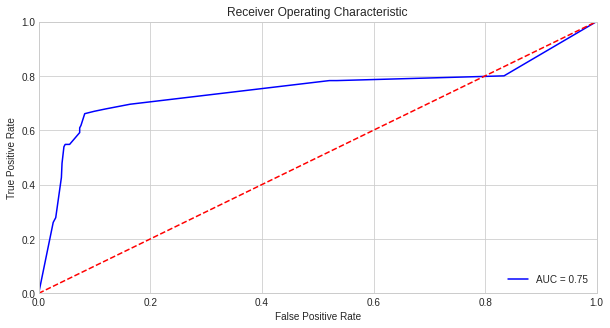

In [160]:
probs = dec_tree1.predict_proba(X_test_scale)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)



fig=plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From the above ROC curve, the AUC is 0.74

In [161]:
print('The best score with the decision tree classifier with the value of max_depth= 10 : {} '.format(round(mean_dec_tree_crossval_score,4)))

The best score with the decision tree classifier with the value of max_depth= 10 : 0.4897 


## Comparing and choosing the best model

In [162]:
model_evaluation = {'Model':['KNN Classifier','Logistic Regression Classifier','Linear SVM Classifier',
                       'SVM:Linear Kernel','SVM:RBF Kernel','SVM:Polynomial Kernel', 'Decision Tree Classifier'],
              'Best Test Score':[cross_val_knn_mean,cross_val_logreg_1_mean, mean_crossval_linearsvm, mean_linear_kernel_svc_crossval_score,
                            mean_rbf_kernel_svc_crossval_score, mean_poly_kernel_svc_crossval_score, mean_dec_tree_crossval_score]}

models_df = pd.DataFrame(model_evaluation)
models_df

,Model,Best Test Score
0,KNN Classifier,0.352842
1,Logistic Regression Classifier,0.425897
2,Linear SVM Classifier,0.381506
3,SVM:Linear Kernel,0.365944
4,SVM:RBF Kernel,0.518437
5,SVM:Polynomial Kernel,0.513740
6,Decision Tree Classifier,0.489664


### Sorted list of applied models

In [163]:
models_df = models_df.sort_values(by='Best Test Score',ascending=False)
models_df

,Model,Best Test Score
4,SVM:RBF Kernel,0.518437
5,SVM:Polynomial Kernel,0.513740
6,Decision Tree Classifier,0.489664
1,Logistic Regression Classifier,0.425897
2,Linear SVM Classifier,0.381506
3,SVM:Linear Kernel,0.365944
0,KNN Classifier,0.352842


<AxesSubplot:xlabel='Model', ylabel='Best Test Score'>

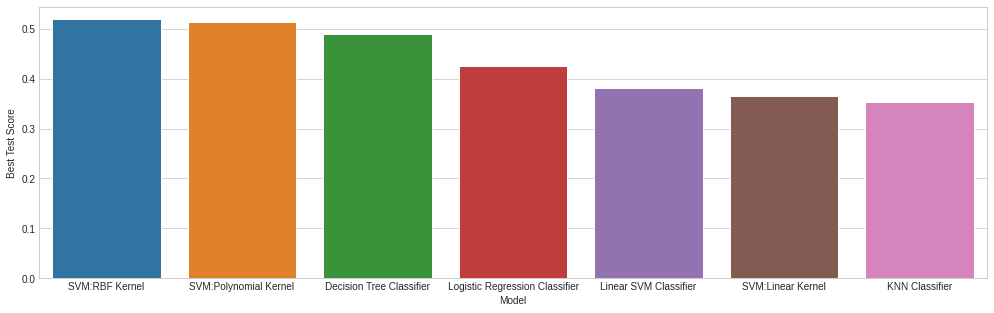

In [164]:
fig = plt.figure(figsize=(17,5))
sns.barplot(x='Model',y='Best Test Score',data=models_df)

From the above comparison we see that, SVM model with rbf kernel is the best model amongst all with highest best score.

## Applying prediction using the best model identified (SVM:RBF Kernel)

In [165]:
rbf_kernel_svc_final = SVC(kernel='rbf',C=1000,gamma=0.1)
rbf_kernel_svc_final.fit(X_train_scale,Y_train)

SVC(C=1000, gamma=0.1)

In [166]:
#predictions
rbf_kernel_preds = rbf_kernel_svc_final.predict(X_test_scale)
print(rbf_kernel_preds)

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [167]:
# printing the confusion matrix
confusion_matrix(rbf_kernel_preds,Y_test)

array([[822,  63],
       [ 63,  52]])

In [168]:
# printing the precision, recall and f1 score
best_model_report = classification_report(Y_test,rbf_kernel_preds)
print(best_model_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       885
           1       0.45      0.45      0.45       115

    accuracy                           0.87      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.87      0.87      0.87      1000



From the above best model report, we see that we are able to identify that about 45% of the people will be subscribing to the term deposit of the bank (Recall). 45% of the people who will be subscribing to the term deposit were correctly predicted (Precision). F1 score of the model is 45%. This way we balanced the precision and recall and this minimized the false positives which was our goal of the project.

# Classification Project Part 2

## Hard Voting

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [170]:
svm_clf1 = SVC(C = 1000, gamma=0.1, kernel='rbf', probability = True, random_state= 0)
dtree1 = DecisionTreeClassifier(max_depth=10,random_state=0)
voting_clf1 = VotingClassifier(estimators=[('svm',svm_clf1), ('dectree', dtree1)], voting='hard', n_jobs = jobs)
voting_clf1.fit(X_train_scale,Y_train)
print("Training Score:",voting_clf1.score(X_train_scale,Y_train))
print("Testing Score:",voting_clf1.score(X_test_scale,Y_test))

for clf1 in (svm_clf1, dtree1):
    clf1.fit(X_train_scale, Y_train)
    y_pred1 = clf1.predict(X_test_scale)
    print(clf1.__class__.__name__, '%.4f'%accuracy_score(Y_test, y_pred1))

kfold = KFold(n_splits=5)
hard_voting_crossval_score = cross_val_score(voting_clf1,X_train_scale,Y_train, scoring='f1', verbose=5, cv=kfold, n_jobs = jobs)
mean_crossval_hard_voting = hard_voting_crossval_score.mean()

print('F1 Score',hard_voting_crossval_score.mean())

mean_crossval_hard_voting

Training Score: 0.96675
Testing Score: 0.903
SVC 0.8740
DecisionTreeClassifier 0.9030


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


F1 Score 0.4033800180873719


[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    1.3s finished


0.4033800180873719

Thus the best cross validation score (F1 Score) with hard voting using Decision Tree Classifier and SVM model with rbf kernel is: 0.4033.

## Soft Voting

In [171]:
#knn2 = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')
svm_clf2 = SVC(C = 1000, gamma=0.1, kernel='rbf', probability = True, random_state= 0)
dtree2 = DecisionTreeClassifier(max_depth=10,random_state=0)
#logreg2 = LogisticRegression(multi_class='auto',C=100, penalty='l2', solver='lbfgs', max_iter=1000, random_state = 0)
voting_clf2 = VotingClassifier(estimators=[('svm',svm_clf2), ('dectree', dtree2)], voting='soft',n_jobs = jobs)
voting_clf2.fit(X_train_scale,Y_train)
print("Training Score:",voting_clf2.score(X_train_scale,Y_train))
print("Testing Score:",voting_clf2.score(X_test_scale,Y_test))

for clf2 in (svm_clf2, dtree2):
    clf2.fit(X_train_scale, Y_train)
    y_pred2 = clf2.predict(X_test_scale)
    print(clf2.__class__.__name__, '%.4f'%accuracy_score(Y_test, y_pred2))

soft_voting_crossval_score = cross_val_score(voting_clf2,X_train_scale,Y_train,scoring='f1',verbose=5,cv=kfold, n_jobs = jobs)
mean_crossval_soft_voting = soft_voting_crossval_score.mean()

print('F1 Score',soft_voting_crossval_score.mean())

mean_crossval_soft_voting


Training Score: 0.97075
Testing Score: 0.894
SVC 0.8740
DecisionTreeClassifier 0.9030


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    1.3s finished


F1 Score 0.4808181998824077


0.4808181998824077

Thus the best cross validation score (F1 Score) with soft voting using Decision Tree Classifier and SVM model with rbf kernel is: 0.4808.

## Applying 2 models with bagging and pasting

Models on which bagging and pasting would be performed - 
1. Decision Tree Classifier
2.  Kernelized SVM (rbf)

## Applying Bagging

### 1. Decision Tree Classifier

In [172]:
param_grid_21 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                 'max_features':[0.01, 0.1, 0.5, 1],
                 'n_estimators':[200, 300, 400, 500],
                 'bootstrap':[True]}

dectree_clf1 = DecisionTreeClassifier(max_depth=10, random_state=0)
bag_clf1 = BaggingClassifier(dectree_clf1, random_state=0, n_jobs = jobs)
f1_scorer = make_scorer(f1_score, pos_label=1)

bag_grid1 = GridSearchCV(bag_clf1, param_grid = param_grid_21, cv = kfold, n_jobs = jobs, scoring=f1_scorer)
bag_grid1.fit(X_train_scale, Y_train)

# print("Training Score:",bag_grid1.score(X_train_scale,Y_train))
# print("Testing Score:",bag_grid1.score(X_test_scale,Y_test))
Y_pred3 = bag_grid1.predict(X_test_scale)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(bag_grid1.best_score_))
print("Parameters selected:", bag_grid1.best_estimator_)
print("Best Parameters selected:", bag_grid1.best_params_)

Best Score: 0.2202
Parameters selected: BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=0),
                  max_features=0.5, max_samples=0.5, n_estimators=200,
                  n_jobs=10, random_state=0)
Best Parameters selected: {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


Thus the best score by applying bagging on Decision Tree Classifier with best parameters, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200 is: 0.2202.

### Applying best parameters

In [173]:
bag_clf_final = BaggingClassifier(DecisionTreeClassifier(max_depth = 10, random_state = 0), 
                           bootstrap= True,
                           max_features= 0.5,
                           max_samples= 0.5,
                           n_estimators= 200,
                           n_jobs = jobs)
bag_clf_final.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final.score(X_test_scale, Y_test))

Train score: 0.93
Test score: 0.89


In [174]:
bagging_dectree_cross_val_score = cross_val_score(bag_clf_final,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold, n_jobs = jobs)
mean_crossval_bagging_dectree = bagging_dectree_cross_val_score.mean()

print('F1 Score',bagging_dectree_cross_val_score.mean())

mean_crossval_bagging_dectree

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


F1 Score 0.19750274172617277


[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.6s finished


0.19750274172617277

Thus the best cross validation score (F1 Score) by applying best parameters using bagging on Decision Tree Classifier is: 0.1764

### 2. Logistic Regression

In [175]:
param_grid22 = {'max_samples':[0.01, 0.1, 0.5, 1], 
               'max_features':[0.01, 0.1, 0.5, 1],
               'n_estimators':[200, 300, 400, 500],
               'bootstrap':[True]}

log_reg22 = LogisticRegression(multi_class='auto',C=100, penalty='l2', solver='lbfgs', max_iter=1000, random_state = 0, n_jobs = jobs)
bag_clf2 = BaggingClassifier(log_reg22,random_state=0, n_jobs = jobs)
bag_grid2 = GridSearchCV(bag_clf2, param_grid = param_grid22, cv = kfold, n_jobs = jobs, scoring=f1_scorer)
bag_grid2.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(bag_grid2.best_score_))
print("Parameters selected:", bag_grid2.best_estimator_)
print("Best Parameters selected:", bag_grid2.best_params_)

Best Score: 0.1886
Parameters selected: BaggingClassifier(base_estimator=LogisticRegression(C=100, max_iter=1000,
                                                    n_jobs=10, random_state=0),
                  max_features=0.5, max_samples=0.5, n_estimators=200,
                  n_jobs=10, random_state=0)
Best Parameters selected: {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


Thus the best score by applying bagging on Logistic Regression Model with best parameters, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200 is: 0.1886.

<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_test_score'>

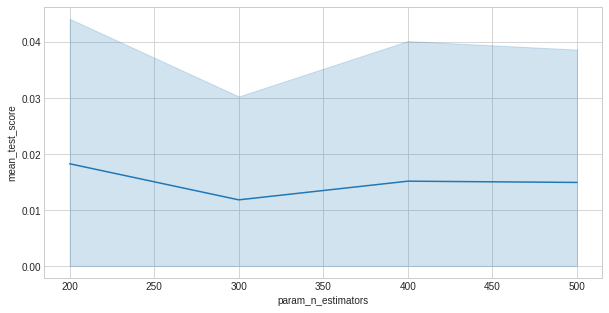

In [176]:
grid_results_log1 = pd.DataFrame(bag_grid2.cv_results_)
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=grid_results_log1['param_n_estimators'],y=grid_results_log1['mean_test_score'])

### Applying best parameters

In [177]:
bag_clf_final1 = BaggingClassifier(LogisticRegression(multi_class='auto',C=100, penalty='l2', solver='lbfgs', max_iter=1000, random_state = 0), 
                                   bootstrap= True, max_features= 0.5, max_samples= 0.5, n_estimators= 200, n_jobs = jobs)
bag_clf_final1.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final1.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final1.score(X_test_scale, Y_test))

Train score: 0.89
Test score: 0.89


In [178]:
bagging_logreg_crossval_score1 = cross_val_score(bag_clf_final1,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold, n_jobs = jobs)
mean_crossval_bagging_logreg1 = bagging_logreg_crossval_score1.mean()

print('F1 Score',bagging_logreg_crossval_score1.mean())

mean_crossval_bagging_logreg1

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    6.9s remaining:   10.4s


F1 Score 0.13767726009446032


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    7.2s finished


0.13767726009446032

Thus the best cross validation score (F1 Score) by applying best parameters using bagging on Logistic Regression Model is: 0.1541.

## Applying Pasting

### 1. Decision Tree Classifier

In [179]:
param_grid_23 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                 'max_features':[0.01, 0.1, 0.5, 1],
                 'n_estimators':[200, 300, 400, 500],
                 'bootstrap':[False]}

dectree_clf3 = DecisionTreeClassifier(max_depth=10, random_state=0)
bag_clf3 = BaggingClassifier(dectree_clf3, random_state=0,n_jobs = jobs)
f1_scorer = make_scorer(f1_score, pos_label=1)

bag_grid3 = GridSearchCV(bag_clf3, param_grid = param_grid_23, cv = kfold, n_jobs = jobs, scoring=f1_scorer)
bag_grid3.fit(X_train_scale, Y_train)

Y_pred3 = bag_grid3.predict(X_test_scale)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(bag_grid3.best_score_))
print("Parameters selected:", bag_grid3.best_estimator_)
print("Best Parameters selected:", bag_grid3.best_params_)

Best Score: 0.2539
Parameters selected: BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=0),
                  bootstrap=False, max_features=0.5, max_samples=0.5,
                  n_estimators=200, n_jobs=10, random_state=0)
Best Parameters selected: {'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


Thus the best score by applying pasting on Decision Tree Classifier with best parameters, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200 is: 0.2539.

### Applying best parameters

In [180]:
bag_clf_final2 = BaggingClassifier(DecisionTreeClassifier(max_depth = 10, random_state = 0), 
                           bootstrap= False,
                           max_features= 0.5,
                           max_samples= 0.5,
                           n_estimators= 200,n_jobs = jobs)
bag_clf_final2.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final2.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final2.score(X_test_scale, Y_test))

Train score: 0.95
Test score: 0.89


In [181]:
bagging_dectree_crossval_score3 = cross_val_score(bag_clf_final2,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold,n_jobs = jobs)
mean_crossval_bagging_dectree3 = bagging_dectree_crossval_score3.mean()

print('F1 Score',bagging_dectree_crossval_score3.mean())

mean_crossval_bagging_dectree3

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


F1 Score 0.22379362268912345


[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.6s finished


0.22379362268912345

Thus the best cross validation score (F1 Score) by applying best parameters using pasting on Decision Tree Classifier is: 0.2555.

### 2. Logistic Regression 

In [182]:
param_grid24 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                'max_features':[0.01, 0.1, 0.5, 1],
                'n_estimators':[200, 300, 400, 500],
                'bootstrap':[False]}

log_reg24 = LogisticRegression(multi_class='auto',C=100, penalty='l2', solver='lbfgs', max_iter=1000, random_state = 0, n_jobs = jobs)
bag_clf4 = BaggingClassifier(log_reg24,random_state=0,n_jobs = jobs)
bag_grid4 = GridSearchCV(bag_clf4, param_grid = param_grid24, cv = kfold, scoring=f1_scorer,n_jobs = jobs)
bag_grid4.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(bag_grid4.best_score_))
print("Parameters selected:", bag_grid4.best_estimator_)
print("Best Parameters selected:", bag_grid4.best_params_)

Best Score: 0.1819
Parameters selected: BaggingClassifier(base_estimator=LogisticRegression(C=100, max_iter=1000,
                                                    n_jobs=10, random_state=0),
                  bootstrap=False, max_features=0.5, max_samples=0.5,
                  n_estimators=200, n_jobs=10, random_state=0)
Best Parameters selected: {'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


Thus the best score by applying pasting on Logistic Regression Model with best parameters, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200 is: 0.1819.

<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_test_score'>

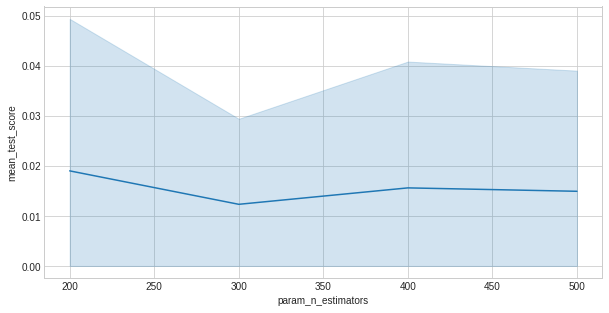

In [183]:
grid_results_log2 = pd.DataFrame(bag_grid4.cv_results_)
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=grid_results_log2['param_n_estimators'],y=grid_results_log2['mean_test_score'])

### Applying best parameters

In [184]:
bag_clf_final3 = BaggingClassifier(LogisticRegression(multi_class='auto',C=100, penalty='l2', solver='lbfgs', max_iter=1000, random_state = 0), 
                                   bootstrap= False, max_features= 0.5, max_samples= 0.5, n_estimators= 200, n_jobs = jobs)
bag_clf_final3.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final3.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final3.score(X_test_scale, Y_test))

Train score: 0.89
Test score: 0.89


In [185]:
bagging_logreg_crossval_score2 = cross_val_score(bag_clf_final1,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold, n_jobs = jobs)
mean_crossval_bagging_logreg2 = bagging_logreg_crossval_score2.mean()

print('F1 Score',bagging_logreg_crossval_score2.mean())

mean_crossval_bagging_logreg2

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.8s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    7.4s finished


F1 Score 0.16592930974374273


0.16592930974374273

Thus the best cross validation score (F1 Score) by applying best parameters using pasting on Logistic Regression Model is: 0.1528.

## Applying AdaBoost Boosting

### 1. Decision Tree Classifier

In [186]:
param_grid25 = {'n_estimators':[100, 500, 1000],
                'learning_rate':[0.1, 0.5, 1]}

ada_grid = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=0), algorithm="SAMME.R"), param_grid25, cv = kfold, scoring= f1_scorer, n_jobs = jobs)
ada_grid.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(ada_grid.best_score_))
print("Parameters selected:", ada_grid.best_estimator_)
print("Best Parameters selected:", ada_grid.best_params_)

Best Score: 0.5287
Parameters selected: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=100)
Best Parameters selected: {'learning_rate': 0.1, 'n_estimators': 100}


Thus the best score by applying AdaBoosting on Decision Tree Classifier with best parameters, 'learning_rate': 0.1, 'n_estimators': 100 is: 0.4992.

### Applying best parameters

In [187]:
bag_clf_final4 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10, random_state = 0),
                           n_estimators= 500,
                           learning_rate= 0.1, algorithm="SAMME.R")
bag_clf_final4.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final4.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final4.score(X_test_scale, Y_test))

Train score: 1.00
Test score: 0.89


In [188]:
adaboost_dectree_crossval_score = cross_val_score(bag_clf_final4,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold,n_jobs = jobs)
mean_crossval_adaboost_dectree = adaboost_dectree_crossval_score.mean()

print('F1 Score',adaboost_dectree_crossval_score.mean())

mean_crossval_adaboost_dectree

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


F1 Score 0.49262359595268174


[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.9s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    6.0s finished


0.49262359595268174

Thus the best cross validation score (roc_auc Score) by applying best parameters using AdaBoosting on Decision Tree Classifier Model is: 0.4845.

### 2. Logistic Regression

In [189]:
param_grid26 = {'n_estimators':[100, 500, 1000],
                'learning_rate':[0.1, 0.5, 1]}

log_reg26 = LogisticRegression(multi_class='auto',C=100, penalty='l2', solver='lbfgs', max_iter=1000, random_state = 0, n_jobs = jobs)
ada_grid1 = GridSearchCV(AdaBoostClassifier(log_reg26, algorithm="SAMME.R"), param_grid26, cv = kfold, scoring= f1_scorer, n_jobs = jobs)
ada_grid1.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(ada_grid1.best_score_))
print("Parameters selected:", ada_grid1.best_estimator_)
print("Best Parameters selected:", ada_grid1.best_params_)

Best Score: 0.3510
Parameters selected: AdaBoostClassifier(base_estimator=LogisticRegression(C=100, max_iter=1000,
                                                     n_jobs=10,
                                                     random_state=0),
                   learning_rate=0.1, n_estimators=500)
Best Parameters selected: {'learning_rate': 0.1, 'n_estimators': 500}


Thus the best score by applying AdaBoosting on Logistic Regression Model with best parameters, 'learning_rate': 0.1, 'n_estimators': 500 is: 0.3510.

### Applying best parameters

In [190]:
bag_clf_final5 = AdaBoostClassifier(LogisticRegression(multi_class='auto',C=100, 
                                                       penalty='l2', solver='lbfgs', 
                                                       max_iter=1000, random_state = 0),
                           n_estimators= 500,
                           learning_rate= 0.1, algorithm="SAMME.R")
bag_clf_final5.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final5.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final5.score(X_test_scale, Y_test))

Train score: 0.90
Test score: 0.89


In [191]:
adaboost_logreg_crossval_score = cross_val_score(bag_clf_final5,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold, n_jobs = jobs)
mean_crossval_adaboost_logreg = adaboost_logreg_crossval_score.mean()

print('F1 Score',adaboost_logreg_crossval_score.mean())

mean_crossval_adaboost_logreg

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


F1 Score 0.3509934565347607


[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    1.8s finished


0.3509934565347607

Thus the best cross validation score (F1 Score) by applying best parameters using AdaBoosting on Logistic Regression Model is: 0.3509.

## Applying Gradient Boosting

In [192]:
param_grid27 = {'n_estimators':[100, 500, 1000],
                'learning_rate':[0.1, 0.5, 1]}

grad_grid = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid27, cv = kfold,scoring=f1_scorer, n_jobs = jobs)
grad_grid.fit(X_train_scale, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grad_grid.best_score_))
print("Parameters selected:", grad_grid.best_estimator_)
print("Best Parameters selected:", grad_grid.best_params_)

Best Score: 0.5649
Parameters selected: GradientBoostingClassifier(learning_rate=0.5, random_state=0)
Best Parameters selected: {'learning_rate': 0.5, 'n_estimators': 100}


Thus the best score by applying GradientBoosting with best parameters, 'learning_rate': 0.5, 'n_estimators': 100 is: 0.5649.

### Applying best parameters

In [193]:
bag_clf_final6 = GradientBoostingClassifier(random_state = 0,
                           n_estimators= 100,
                           learning_rate= 0.5)
bag_clf_final6.fit(X_train_scale, Y_train)

print('Train score: %.2f'%bag_clf_final6.score(X_train_scale, Y_train))
print('Test score: %.2f'%bag_clf_final6.score(X_test_scale, Y_test))

Train score: 0.98
Test score: 0.89


In [194]:
gradboost_crossval_score = cross_val_score(bag_clf_final6,X_train_scale,Y_train,scoring=f1_scorer,verbose=5,cv=kfold, n_jobs = jobs)
mean_crossval_gradboost = gradboost_crossval_score.mean()

print('F1 Score',gradboost_crossval_score.mean())

mean_crossval_gradboost

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


F1 Score 0.5648547720709143


[Parallel(n_jobs=10)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.4s finished


0.5648547720709143

Thus the best cross validation score (F1 Score) by applying best parameters using GradientBoosting is: 0.5648.

## PCA

Using PCA we can cut down the features to lesser than half and also keep almost 90% of the variance in the dataset

In [195]:
pca = PCA(n_components=0.90,random_state=0)
X_train_reduced = pca.fit_transform(X_train_scale)
X_test_reduced = pca.transform(X_test_scale)

In [196]:
X_test_reduced.shape

(1000, 18)

We will run all the previous models in project part 1 on the reduced dataset

## Applying models with PCA

### 1. K - Nearest Neighbor with PCA

In [197]:
num = list(range(1,20))
knn = KNeighborsClassifier()

grid_params_pca_1  = {'n_neighbors':num}
kfold = KFold(n_splits=5)
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_knn_pca = GridSearchCV(knn,grid_params_pca_1,cv=kfold,verbose=3,scoring=f1_scorer, n_jobs = jobs)

grid_knn_pca.fit(X_train_reduced,Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_knn_pca.best_score_))
print("Parameters selected:", grid_knn_pca.best_estimator_)
print("Best Parameters selected:", grid_knn_pca.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best Score: 0.3403
Parameters selected: KNeighborsClassifier(n_neighbors=1)
Best Parameters selected: {'n_neighbors': 1}


From above we see that the best score is 0.3403 when KNN model is applied on the reduced dataset. The best parameters are 'n_neighbors': 1.

In [198]:
logresults_knn_pca = pd.DataFrame(grid_knn_pca.cv_results_)

Text(0.5, 1.0, 'Testing Accuracy For K(Neighbours)')

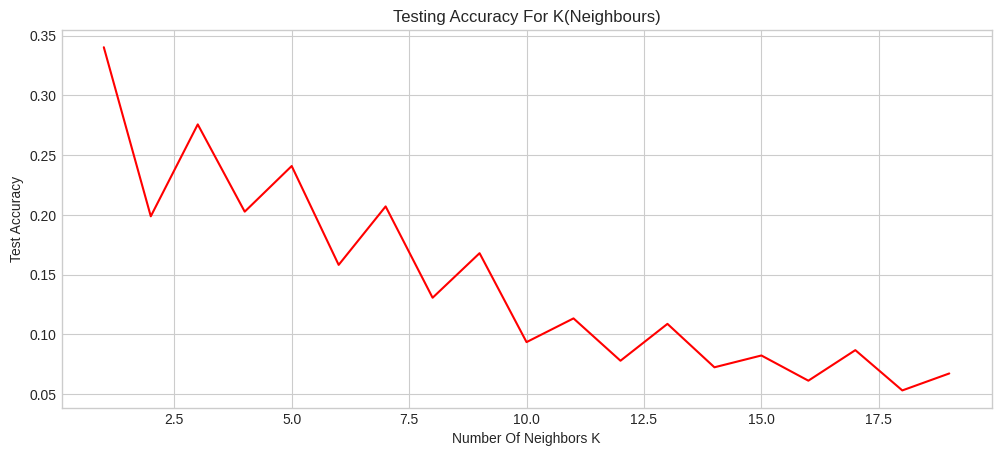

In [199]:
fig = plt.figure(figsize=(12,5),dpi=100)
sns.lineplot(data=logresults_knn_pca,x=logresults_knn_pca['param_n_neighbors'],y=logresults_knn_pca['mean_test_score'],color='red')
plt.xlabel('Number Of Neighbors K')
plt.ylabel('Test Accuracy')
plt.title('Testing Accuracy For K(Neighbours)')

### Applying the best parameters

In [200]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs = jobs)

In [201]:
#Cross validation train and test scores
knn_crossval_scores_train= cross_val_score(knn,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of KNN model on reduced dataset from Cross Validation: {0:.4f}'.format(knn_crossval_scores_train.mean()))
knn_crossval_scores_test = cross_val_score(knn,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of KNN model on reduced dataset from Cross Validation:  {0:.4f}'.format(knn_crossval_scores_test.mean()))

Average Train Score of KNN model on reduced dataset from Cross Validation: 0.3403
Average Test Score of KNN model on reduced dataset from Cross Validation:  0.2397


In [202]:
print('The cross validated F1 score of the best knn model with 1 neighbours on the reduced dataset by pca is: {}'.format(round(knn_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best knn model with 1 neighbours on the reduced dataset by pca is: 0.3403


Thus the best cross validation score with the best parameter of KNN model and value of n_neighbor : 1 on reduced dataset is: 0.3403

### 2. Logistic Regression with PCA

In [203]:
log_reg_pca1 = LogisticRegression(random_state=0, n_jobs = jobs)
grid_params_pca_2 = {'penalty':['l1','l2'],
                     'solver':['liblinear', 'lbfgs'],
                     'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_logreg_pca = GridSearchCV(log_reg_pca1,grid_params_pca_2,cv=kfold,verbose=5,scoring=f1_scorer,return_train_score=True, n_jobs = jobs)
grid_logreg_pca.fit(X_train_reduced,Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_logreg_pca.best_score_))
print("Parameters selected:", grid_logreg_pca.best_estimator_)
print("Best Parameters selected:", grid_logreg_pca.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Score: 0.0160
Parameters selected: LogisticRegression(C=10, n_jobs=10, random_state=0, solver='liblinear')
Best Parameters selected: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.                nan 0.         0.         0.                nan
 0.         0.         0.                nan 0.00434783 0.00434783
 0.00822264        nan 0.00817689 0.00817689 0.01230455        nan
 0.01602564 0.01602564 0.01602564        nan 0.01602564 0.01602564
 0.01602564        nan 0.01602564 0.01602564]
  warnings.warn(
/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.                nan 0.         0.         0.                nan
 0.         0.         0.                nan 0.         0.
 0.01048766        nan 0.01048766 0.01048766 0.01463903        nan
 0.01563379 0.01563379 0.01563379        nan 0.01563379 0.01563379
 0.01563379        nan 0.01563379 0.

From the above analysis we see that, the best score is 0.0160. The best parameter found is 'C': 10, 'penalty': 'l2', 'solver': 'liblinear'.

In [204]:
logresults_logreg_pca = pd.DataFrame(grid_logreg_pca.cv_results_)

Text(0.5, 1.0, 'Displaying The Test Score for the Range of cost function C And For Different Norms')

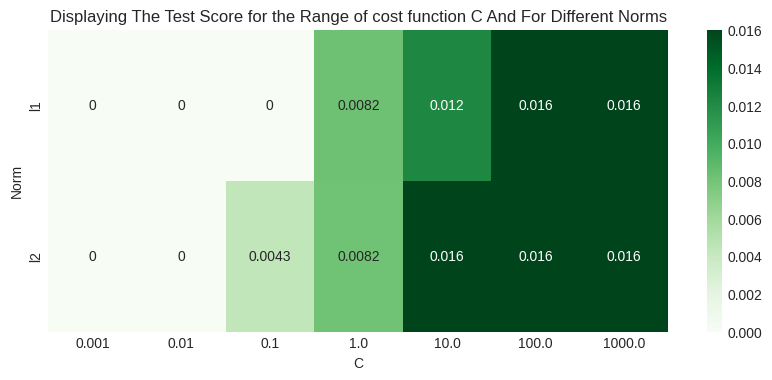

In [205]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(logresults_logreg_pca.pivot_table(index='param_penalty',columns='param_C',values='mean_test_score'),cmap='Greens',annot=True)
plt.xlabel('C')
plt.ylabel('Norm')
plt.title('Displaying The Test Score for the Range of cost function C And For Different Norms')

From the above analysis we can see that the best score can be obtained when the test score with the Logisic Regression model with PCA is used with the Cost function (C) = 10 and Norm = l2.

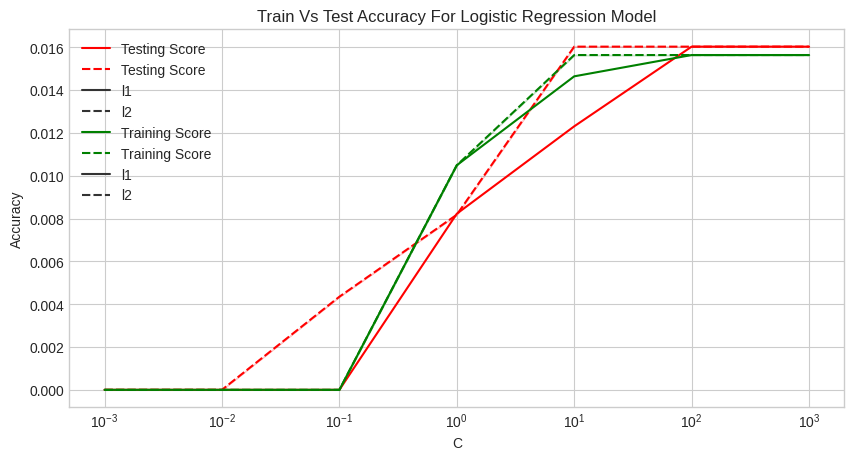

In [206]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(x= logresults_logreg_pca['param_C'],y= logresults_logreg_pca['mean_test_score'],
style=logresults_logreg_pca['param_penalty'],color='red',label='Testing Score')

sns.lineplot(x= logresults_logreg_pca['param_C'],y= logresults_logreg_pca['mean_train_score'],
             style=logresults_logreg_pca['param_penalty'],color='green',label='Training Score')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For Logistic Regression Model')
plt.legend()

From the above analysis, we see that the best testing score is obtained when the Logistic Regression model with PCA is used with The Cost Fuction(C) = 10 and the Norm 'l2' is used.

### Applying the best parameters

In [207]:
log_reg_pca2 = LogisticRegression(penalty='l2',C=10,solver='liblinear', n_jobs = jobs)
log_reg_pca2.fit(X_train_reduced,Y_train)

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(C=10, n_jobs=10, solver='liblinear')

In [208]:
#Cross validation train and test scores
logreg_crossval_scores_train= cross_val_score(log_reg_pca2,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of Logestic Regression model on reduced dataset from Cross Validation: {0:.4f}'.format(logreg_crossval_scores_train.mean()))
logreg_crossval_scores_test = cross_val_score(log_reg_pca2,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of Logestic Regression model on reduced dataset from Cross Validation:  {0:.4f}'.format(logreg_crossval_scores_test.mean()))

Average Train Score of Logestic Regression model on reduced dataset from Cross Validation: 0.0160
Average Test Score of Logestic Regression model on reduced dataset from Cross Validation:  0.0590


In [209]:
print('The cross validated F1 score of the best Logestic Regression model with penalty=l2 and C=10 on the reduced dataset is: {}'.format(round(logreg_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best Logestic Regression model with penalty=l2 and C=10 on the reduced dataset is: 0.016


Thus the best cross validation score with the best parameter of Logistic Regression model and value of C : 10, solver: 'liblinear' and norm:'l2' on reduced dataset is: 0.01602

### 3. Linear Support Vector Machines with PCA

In [210]:
linear_svm_pca1 = LinearSVC(dual=False)
linear_svm_pca1.fit(X_train_reduced,Y_train)

grid_params_pca_3 = {'C':[0.001,0.01,0.1,1,10,100,1000],
                     'penalty':['l1','l2']}

grid_linsvm_pca = GridSearchCV(linear_svm_pca1,grid_params_pca_3,cv=kfold,verbose=5,scoring=f1_scorer,return_train_score=True, n_jobs = jobs)
grid_linsvm_pca.fit(X_train_reduced,Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_linsvm_pca.best_score_))
print("Parameters selected:", grid_linsvm_pca.best_estimator_)
print("Best Parameters selected:", grid_linsvm_pca.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score: 0.0000
Parameters selected: LinearSVC(C=0.001, dual=False, penalty='l1')
Best Parameters selected: {'C': 0.001, 'penalty': 'l1'}


From the above analysis we see that the best score is 0.0000 and we can conclude that it is not a good model. The best parameters are 'C': 0.001, 'penalty': 'l1'

In [211]:
logresults_linsvm_pca = pd.DataFrame(grid_linsvm_pca.cv_results_)

### Applying best parameters

In [212]:
linear_svm_pca2 = LinearSVC(penalty='l1',C=0.001,dual=False)
linear_svm_pca2.fit(X_train_reduced,Y_train)

LinearSVC(C=0.001, dual=False, penalty='l1')

In [213]:
#Cross validation train and test scores
linear_svm_crossval_scores_train= cross_val_score(linear_svm_pca2,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of Linear SVM model on reduced dataset from Cross Validation: {0:.4f}'.format(linear_svm_crossval_scores_train.mean()))
linear_svm_crossval_scores_test = cross_val_score(linear_svm_pca2,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of Linear SVM model on reduced dataset from Cross Validation:  {0:.4f}'.format(linear_svm_crossval_scores_test.mean()))

Average Train Score of Linear SVM model on reduced dataset from Cross Validation: 0.0000
Average Test Score of Linear SVM model on reduced dataset from Cross Validation:  0.0000


In [214]:
print('The cross validated F1 score of the best Linear SVM model with penalty=l1 and C=0.001 on the reduced dataset is: {}'.format(round(linear_svm_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best Linear SVM model with penalty=l1 and C=0.001 on the reduced dataset is: 0.0


Thus the best validation score with the best parameter of Linear SVM model and value of C : 0.001 and penalty:'l1' with pca is: 0.0000

### 4. Kerenilzed Support Vector Machine

### 4.A. Support Vector Machine with Linear Kernel

In [215]:
linear_kernel_svc_pca1 = SVC()
linear_kernel_svc_pca1.fit(X_train_reduced,Y_train)

# Create hyperparameter tuning values for C and gamma keeping kernel as a linear 
grid_params_pca_4 = {'C':[0.001,0.01,0.1,1,10,100],
                     'gamma' :[0.001,0.01,0.1,1,10,100],
                     'kernel' :['linear']}

grid_linkernel_pca = GridSearchCV(linear_kernel_svc_pca1, grid_params_pca_4, return_train_score=True, verbose = 3, cv = kfold, scoring=f1_scorer, n_jobs = jobs)

# Fit the model for grid search  
grid_linkernel_pca.fit(X_train_reduced, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_linkernel_pca.best_score_))
print("Parameters selected by best SVM(linear) model:", grid_linkernel_pca.best_estimator_)
print("Best Parameters selected by best SVM(linear) model:", grid_linkernel_pca.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Score: 0.0000
Parameters selected by best SVM(linear) model: SVC(C=0.001, gamma=0.001, kernel='linear')
Best Parameters selected by best SVM(linear) model: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}


From the above model we see that, the best cross validated score of the model on reduced dataset is 0.0000. Also the best parameters identified by the grid search and 5 fold validation are 'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'.

In [216]:
logresults_linkernel_pca = pd.DataFrame(grid_linkernel_pca.cv_results_)
logresults_linkernel_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073436,0.008271,0.018526,0.003292,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.061064,0.027107,0.013327,0.004036,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.045626,0.004744,0.011614,0.001090,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.069306,0.014027,0.019110,0.003300,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.039901,0.000941,0.011956,0.001053,0.001,10,linear,"{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


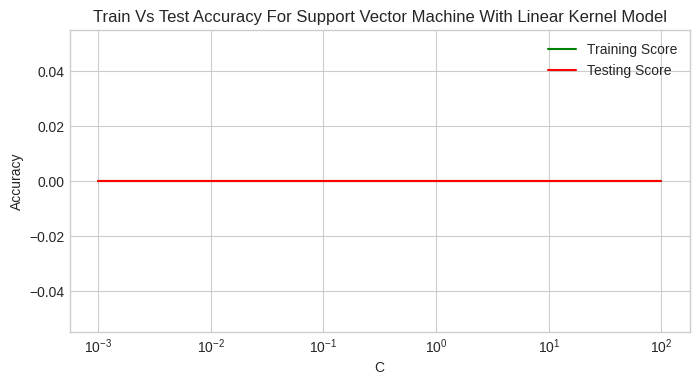

In [217]:
fig = plt.figure(figsize=(8,4),dpi=100)
plt.plot(logresults_linkernel_pca['param_C'],
         logresults_linkernel_pca['mean_train_score'],color='green',label ='Training Score')
plt.plot(logresults_linkernel_pca['param_C'],
         logresults_linkernel_pca['mean_test_score'],color='red',label ='Testing Score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For Support Vector Machine With Linear Kernel Model')
plt.legend()

From the above analysis, we see that the best testing score is 0.0000 when the SVM with Linear Kernel model with PCA is used with The Cost Fuction(C) = 0.001 is used.

### Applying best parameters

In [218]:
linear_kernel_svc_pca1 = SVC(kernel='linear',C=0.001)
linear_kernel_svc_pca1.fit(X_train_reduced,Y_train)

SVC(C=0.001, kernel='linear')

In [219]:
#Cross validation train and test scores
linearkernel_svm_crossval_scores_train= cross_val_score(linear_kernel_svc_pca1,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of Linear SVM model with Linear kernel on reduced dataset from Cross Validation: {0:.4f}'.format(linearkernel_svm_crossval_scores_train.mean()))
linearkernel_svm_crossval_scores_test = cross_val_score(linear_kernel_svc_pca1,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of SVM model with Linear kernel on reduced dataset from Cross Validation:  {0:.4f}'.format(linearkernel_svm_crossval_scores_test.mean()))

Average Train Score of Linear SVM model with Linear kernel on reduced dataset from Cross Validation: 0.0000
Average Test Score of SVM model with Linear kernel on reduced dataset from Cross Validation:  0.0000


In [220]:
print('The cross validated F1 score of the best SVM model with Linear kernel with C=0.001 on the reduced dataset is: {}'.format(round(linearkernel_svm_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best SVM model with Linear kernel with C=0.001 on the reduced dataset is: 0.0


Thus the best cross validated score with the best parameter of SVM model with Linear Kernel and value of C : 0.001 on reduced dataset is: 0.0000

### 4.B.  Support Vector Machine with RBF Kernel with PCA

In [221]:
rbf_kernel_svc_pca1 = SVC()
rbf_kernel_svc_pca1.fit(X_train_reduced,Y_train)

grid_params_pca_4 = {'gamma':[0.001,0.01,0.1,1,10,100,1000],
                     'C':[0.001,0.01,0.1,1,10,100,1000],
                     'kernel':['rbf']}
grid_rbfkernel_pca = GridSearchCV(rbf_kernel_svc_pca1,grid_params_pca_4,cv=kfold,scoring=f1_scorer,return_train_score=True,verbose=5, n_jobs = jobs)

# Fit the model for grid search  
grid_rbfkernel_pca.fit(X_train_reduced, Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_rbfkernel_pca.best_score_))
print("Parameters selected by best SVM(rbf) model:", grid_rbfkernel_pca.best_estimator_)
print("Best Parameters selected by best SVM(rbf) model:", grid_rbfkernel_pca.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Score: 0.3300
Parameters selected by best SVM(rbf) model: SVC(C=1000, gamma=1)
Best Parameters selected by best SVM(rbf) model: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


From the above model we see that, the best cross validated score of the SVM model with rbf kernel on reduced dataset is 0.3300. Also the best parameters identified by the grid search and 5 fold validation are 'C': 1000, 'gamma': 1, 'kernel': 'rbf'.

In [222]:
logresults_rbfkernel_pca = pd.DataFrame(grid_rbfkernel_pca.cv_results_)
logresults_rbfkernel_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.142537,0.022586,0.041221,0.000991,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.109505,0.027992,0.034336,0.007596,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.102159,0.029585,0.034987,0.007426,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100736,0.030254,0.034542,0.008217,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.061989,0.002061,0.024356,0.000873,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying best parameters

In [223]:
rbf_kernel_svc_pca2 = SVC(kernel='rbf',C=1000,gamma=1)
rbf_kernel_svc_pca2.fit(X_train_reduced,Y_train)

SVC(C=1000, gamma=1)

In [224]:
#Cross validation train and test scores
rbfkernel_svm_crossval_scores_train= cross_val_score(rbf_kernel_svc_pca2,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of Linear SVM model with rbf kernel on reduced dataset from Cross Validation: {0:.4f}'.format(rbfkernel_svm_crossval_scores_train.mean()))
rbfkernel_svm_crossval_scores_test = cross_val_score(rbf_kernel_svc_pca2,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of SVM model with rbf kernel on reduced dataset from Cross Validation:  {0:.4f}'.format(rbfkernel_svm_crossval_scores_test.mean()))

Average Train Score of Linear SVM model with rbf kernel on reduced dataset from Cross Validation: 0.3300
Average Test Score of SVM model with rbf kernel on reduced dataset from Cross Validation:  0.2095


In [225]:
print('The cross validated F1 score of the best SVM model with rbf kernel with C=1000,gamma=1 on the reduced dataset is: {}'.format(round(rbfkernel_svm_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best SVM model with rbf kernel with C=1000,gamma=1 on the reduced dataset is: 0.33


Thus the best cross validated score with the best parameter of SVM model with rbf Kernel and value of C : 1000 and gamma : 1 on reduced dataset is: 0.3300

### Support Vector Machine with poly Kernel with PCA

In [226]:
poly_kernel_svc_pca1 = SVC()
poly_kernel_svc_pca1.fit(X_train_reduced,Y_train)

grid_params_pca_5 = {'gamma':[0.01,0.1,1,10],
                     'C':[0.01,0.1,1,10],
                     'degree':[1,2],
                     'kernel':['poly']}
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_polykernel_pca = GridSearchCV(poly_kernel_svc_pca1,grid_params_pca_5,cv=kfold,verbose=5,scoring=f1_scorer,return_train_score=True, n_jobs = jobs)
grid_polykernel_pca.fit(X_train_reduced,Y_train)

# Print the score results and parameters for the best model
print("Best Score: {0:.4f}".format(grid_polykernel_pca.best_score_))
print("Parameters selected by best SVM(poly) model:", grid_polykernel_pca.best_estimator_)
print("Best Parameters selected by best SVM(poly) model:", grid_polykernel_pca.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Score: 0.0043
Parameters selected by best SVM(poly) model: SVC(C=1, degree=2, gamma=10, kernel='poly')
Best Parameters selected by best SVM(poly) model: {'C': 1, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}


From the above model we see that, the best score of the SVM model with poly kernel on reduced dataset is 0.0043. Also the best parameters identified by the grid search and 5 fold validation are 'C': 1, 'gamma': 10, 'kernel': 'poly' and 'degree': 2.

In [227]:
logresults_polykernel_pca = pd.DataFrame(grid_polykernel_pca.cv_results_)
logresults_polykernel_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085195,0.021888,0.019404,0.003974,0.01,1,0.01,poly,"{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kerne...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.086505,0.019079,0.019556,0.003964,0.01,1,0.1,poly,"{'C': 0.01, 'degree': 1, 'gamma': 0.1, 'kernel...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071706,0.019078,0.018044,0.004341,0.01,1,1,poly,"{'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.064081,0.018898,0.016790,0.003833,0.01,1,10,poly,"{'C': 0.01, 'degree': 1, 'gamma': 10, 'kernel'...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.074765,0.016245,0.020437,0.002583,0.01,2,0.01,poly,"{'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kerne...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying best parameters

In [228]:
poly_kernel_svc_pca2 = SVC(kernel='poly',C=1,degree=2,gamma=10)
poly_kernel_svc_pca2.fit(X_train_reduced,Y_train)

SVC(C=1, degree=2, gamma=10, kernel='poly')

In [229]:
#Cross validation train and test scores
polykernel_svm_crossval_scores_train= cross_val_score(poly_kernel_svc_pca2,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of SVM model with Poly kernel on reduced dataset from Cross Validation: {0:.4f}'.format(polykernel_svm_crossval_scores_train.mean()))
polykernel_svm_crossval_scores_test = cross_val_score(poly_kernel_svc_pca2,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of SVM model with Poly kernel on reduced dataset from Cross Validation:  {0:.4f}'.format(polykernel_svm_crossval_scores_test.mean()))

Average Train Score of SVM model with Poly kernel on reduced dataset from Cross Validation: 0.0043
Average Test Score of SVM model with Poly kernel on reduced dataset from Cross Validation:  0.2422


In [230]:
print('The cross validated F1 score of the best SVM model with Poly kernel with C=1,degree=2,gamma=10 on the reduced dataset is: {}'.format(round(polykernel_svm_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best SVM model with Poly kernel with C=1,degree=2,gamma=10 on the reduced dataset is: 0.0043


Thus the best cross validated score with the best parameter of SVM model with poly Kernel and value of C : 1 and gamma : 10 and degree:2 on reduced dataset is: 0.0043

### 5. Decision Tree Classifier Model with PCA

In [231]:
dec_tree_pca1  =  DecisionTreeClassifier(random_state=0)
dec_tree_pca1.fit(X_train_reduced, Y_train)

# Create hyperparameter tuning values
grid_params_pca_6 = {"max_depth": [1,5,10,15,20,25,30,35,40,45,50]}

# Create grid search using 5-fold cross validation
grid_dec_tree_pca = GridSearchCV(dec_tree_pca1, grid_params_pca_6, return_train_score=True, verbose = 3, cv = kfold,scoring=f1_scorer, n_jobs = jobs) 
  
# Fit the model for grid search
grid_dec_tree_pca.fit(X_train_reduced, Y_train)

# Print the score results and parameters for the best model 
print("Best Score: {0:.4f}".format(grid_dec_tree_pca.best_score_))
print("Parameters selected by best Decision Tree Classifier model on reduced dataset:", grid_dec_tree_pca.best_estimator_)
print("Best parameters selected by best Decision Tree Classifier model on reduced dataset:", grid_dec_tree_pca.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Score: 0.3019
Parameters selected by best Decision Tree Classifier model on reduced dataset: DecisionTreeClassifier(max_depth=30, random_state=0)
Best parameters selected by best Decision Tree Classifier model on reduced dataset: {'max_depth': 30}


From the above model we see that, the best score of the decision tree model on reduced dataset is 0.3019. Also the best parameters identified by the grid search and 5 fold validation are max_depth: 30.

In [232]:
logresults_dectree_pca = pd.DataFrame(grid_dec_tree_pca.cv_results_)
logresults_dectree_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008581,0.002300,0.001336,0.000238,1,{'max_depth': 1},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.031137,0.005915,0.001414,0.000081,5,{'max_depth': 5},0.156250,0.220588,0.231405,0.229299,0.070796,0.181668,0.061961,10,0.364729,0.424779,0.391081,0.442539,0.230769,0.370779,0.074989
2,0.049354,0.003130,0.001236,0.000079,10,{'max_depth': 10},0.275000,0.209877,0.240000,0.261905,0.324675,0.262291,0.038204,9,0.806801,0.764431,0.721417,0.734899,0.657244,0.736958,0.049463
3,0.065961,0.004588,0.001136,0.000118,15,{'max_depth': 15},0.238095,0.280702,0.269231,0.263959,0.335196,0.277437,0.032073,8,0.928571,0.956399,0.922006,0.901961,0.865443,0.914876,0.030242
4,0.073150,0.005836,0.001232,0.000052,20,{'max_depth': 20},0.293785,0.261364,0.289308,0.277778,0.311558,0.286759,0.016712,7,0.982361,0.991848,0.976190,0.968927,0.943231,0.972511,0.016460


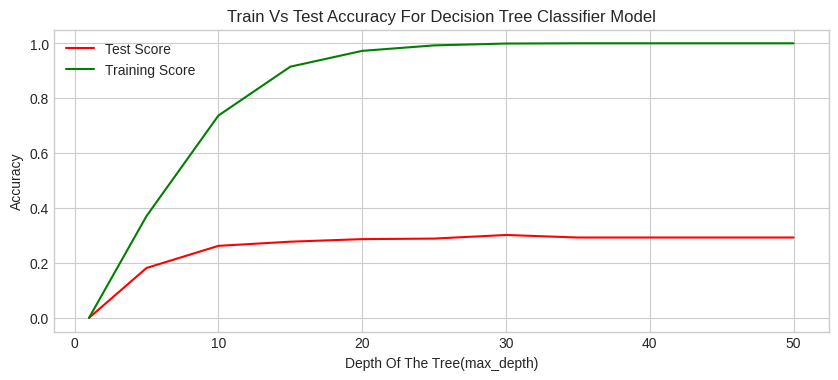

In [233]:
fig = plt.figure(figsize=(10,4),dpi=100)
plt.plot(logresults_dectree_pca['param_max_depth'],logresults_dectree_pca['mean_test_score'],
         c='red',label='Test Score')
plt.plot(logresults_dectree_pca['param_max_depth'],logresults_dectree_pca['mean_train_score'],
         c='green',label='Training Score')

plt.xlabel('Depth Of The Tree(max_depth)')
plt.ylabel('Accuracy')
plt.title('Train Vs Test Accuracy For Decision Tree Classifier Model')
plt.legend()

From the above analysis, we see that the best testing score is obtained when the decision tree model on reduced dataset is used with max_depth: 30.

### Applying best parameters

In [234]:
dec_tree_pca2 = DecisionTreeClassifier(max_depth=30, random_state=0)
dec_tree_pca2.fit(X_train_reduced,Y_train)

DecisionTreeClassifier(max_depth=30, random_state=0)

In [235]:
#Cross validation train and test scores
dectree_svm_crossval_scores_train= cross_val_score(dec_tree_pca2,X_train_reduced,Y_train,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Train Score of Decision Tree model on reduced dataset from Cross Validation: {0:.4f}'.format(dectree_svm_crossval_scores_train.mean()))
dectree_svm_crossval_scores_test = cross_val_score(dec_tree_pca2,X_test_reduced,Y_test,cv=kfold,scoring=f1_scorer, n_jobs = jobs)
print('Average Test Score of Decision Tree model on reduced dataset from Cross Validation:  {0:.4f}'.format(dectree_svm_crossval_scores_test.mean()))

Average Train Score of Decision Tree model on reduced dataset from Cross Validation: 0.3019
Average Test Score of Decision Tree model on reduced dataset from Cross Validation:  0.2992


In [236]:
print('The cross validated F1 score of the best Decision Tree model with max_depth=30 on the reduced dataset is: {}'.format(round(dectree_svm_crossval_scores_train.mean(),4)))

The cross validated F1 score of the best Decision Tree model with max_depth=30 on the reduced dataset is: 0.3019


Thus the best cross validated score with the best parameter of Decision Tree model on reduced dataset with value of max_depth: 30 is: 0.3019

## Comparing Results of Models with PCA and Models without PCA

In [237]:
model_evaluation_PCA = {'Models with PCA':['KNN Classifier with PCA','Logistic Regression with PCA','Linear SVM with PCA',
                       'SVM Linear Kernel with PCA','SVM RBF Kernel with PCA','SVM Polynomial Kernel with PCA','Decision Tree with PCA'],
             'Best Test Scores':[knn_crossval_scores_train.mean(), logreg_crossval_scores_train.mean(), linear_svm_crossval_scores_train.mean(), 
                            linearkernel_svm_crossval_scores_train.mean(), rbfkernel_svm_crossval_scores_train.mean(), polykernel_svm_crossval_scores_train.mean(), dectree_svm_crossval_scores_train.mean()]}

In [238]:
model_evaluation_pca = pd.DataFrame(model_evaluation_PCA)
model_evaluation_pca = model_evaluation_pca.sort_values(by='Best Test Scores',ascending = False)

## Results for Models  with PCA

Text(0.5, 0, 'Test Scores(f1-score)')

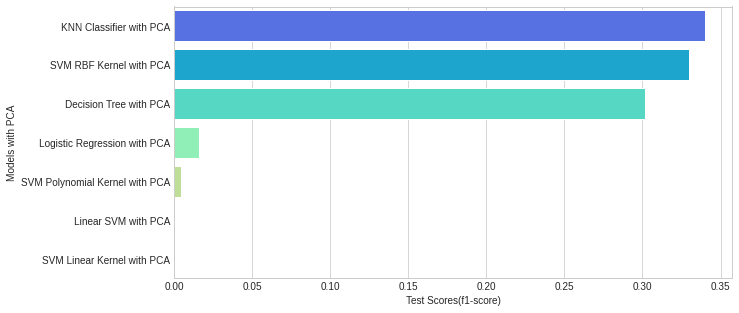

In [239]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=model_evaluation_pca['Best Test Scores'],y=model_evaluation_pca['Models with PCA'],orient='h',palette='rainbow')
plt.ylabel('Models with PCA')
plt.xlabel('Test Scores(f1-score)')

## Results for Models without PCA

In [240]:
model_evaluation_without_pca = {'Models without PCA':['KNN Classifier','Logistic Regression Classifier','Linear SVM Classifier',
                       'SVM:Linear Kernel','SVM:RBF Kernel','SVM:Polynomial Kernel', 'Decision Tree Classifier'],
              'Best TestScore':[cross_val_knn_mean,cross_val_logreg_1_mean, mean_crossval_linearsvm, mean_linear_kernel_svc_crossval_score,
                            mean_rbf_kernel_svc_crossval_score, mean_poly_kernel_svc_crossval_score, mean_dec_tree_crossval_score]}

In [241]:
model_eval_without_pca = pd.DataFrame(model_evaluation_without_pca)
model_eval_without_pca = model_eval_without_pca.sort_values(by='Best TestScore',ascending = False)

Text(0.5, 0, 'Test Scores(f1-score)')

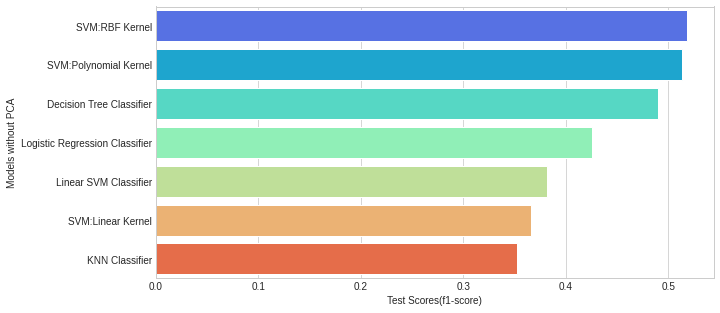

In [242]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=model_eval_without_pca['Best TestScore'],y=model_eval_without_pca['Models without PCA'],orient='h',palette='rainbow')
plt.ylabel('Models without PCA')
plt.xlabel('Test Scores(f1-score)')

### Comparing Results

<AxesSubplot:xlabel='Best Test Scores', ylabel='Models with PCA'>

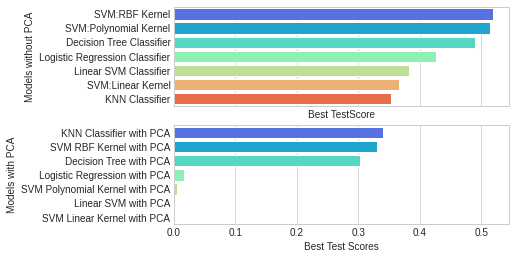

<Figure size 3600x3600 with 0 Axes>

In [243]:
fig, ax =plt.subplots(2,1,sharex=True)
plt.figure(figsize=(50,50))

sns.barplot(x=model_eval_without_pca['Best TestScore'],y=model_eval_without_pca['Models without PCA'],orient='h',palette='rainbow',ax=ax[0])

sns.barplot(x=model_evaluation_pca['Best Test Scores'],y=model_evaluation_pca['Models with PCA'],orient='h',palette='rainbow',ax=ax[1])

In the above analysis we compared models with PCA and models without PCA. When PCA is applied, 90% of the variation of the data is kept and we could reduce the attributes from 41 to 18. We can see that there is a significant loss of information and the F1 scores have decreased in models with PCA compared to the models without PCA.
Thus we can conclude, applying PCA does not improve the performance of the models.

## Deep Learning Models

### Creating and compiling model

In [244]:
def create_model():    
    model = Sequential()
    model.add(Dense(41,input_dim=41,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['Accuracy'])
    return model

In [245]:
seed = 10
np.random.seed(10)

In [246]:
kfold = KFold(n_splits=5)
f1_scorer = make_scorer(f1_score, pos_label=1)

In [247]:
deep_learning_model = KerasClassifier(build_fn= create_model,verbose=0)

grid_params_deep = {'batch_size':[10,20,30,40],
                    'epochs':[10,25,50,100,250,500,1000]}
grid_deep_learning = GridSearchCV(estimator=deep_learning_model,param_grid=grid_params_deep,cv=kfold,verbose=3,scoring=f1_scorer, n_jobs = jobs)
grid_deep_learning.fit(X_train_scale,Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f77fb849f70>,
             n_jobs=10,
             param_grid={'batch_size': [10, 20, 30, 40],
                         'epochs': [10, 25, 50, 100, 250, 500, 1000]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=3)

In [248]:
# Print the score results and parameters for the best model 
print("Best Score: {0:.4f}".format(grid_deep_learning.best_score_))
print("Parameters selected by best Keras Classifier model:", grid_deep_learning.best_estimator_)
print("Best parameters selected by best Keras Classifier model on reduced dataset:", grid_deep_learning.best_params_)

Best Score: 0.5145
Parameters selected by best Keras Classifier model: <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f77fb74cca0>
Best parameters selected by best Keras Classifier model on reduced dataset: {'batch_size': 10, 'epochs': 100}


From the above deep learning model we see that, the best score of the Keras Classifier model on the dataset is 0.5145. Also the best parameters identified by the grid search and 5 fold validation are 'batch_size': 10, 'epochs': 100.

In [249]:
logresults_deeplearning = pd.DataFrame(grid_deep_learning.cv_results_)
logresults_deeplearning.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.350970,0.074545,0.178761,0.015857,10,10,"{'batch_size': 10, 'epochs': 10}",0.435897,0.490323,0.455285,0.552147,0.402778,0.467286,0.051035,15
1,8.630005,1.585428,0.183006,0.023967,10,25,"{'batch_size': 10, 'epochs': 25}",0.000000,0.448980,0.534759,0.546448,0.518519,0.409741,0.207643,19
2,15.256057,2.813980,0.159906,0.022920,10,50,"{'batch_size': 10, 'epochs': 50}",0.415730,0.514620,0.568182,0.514286,0.540541,0.510672,0.051463,4
3,28.523980,0.846164,0.175926,0.011458,10,100,"{'batch_size': 10, 'epochs': 100}",0.494624,0.485549,0.526316,0.502674,0.563536,0.514540,0.027990,1
4,73.199524,1.144467,0.193682,0.009591,10,250,"{'batch_size': 10, 'epochs': 250}",0.377143,0.534884,0.500000,0.522222,0.552083,0.497266,0.062418,9


<AxesSubplot:xlabel='param_epochs', ylabel='mean_test_score'>

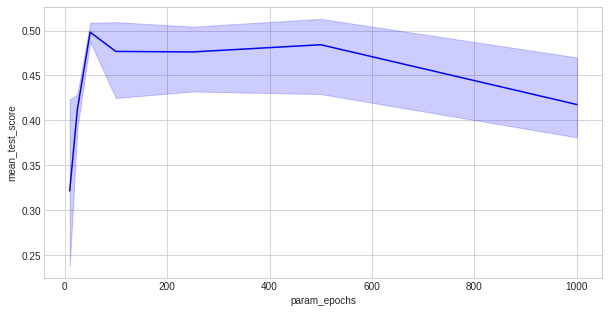

In [250]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=logresults_deeplearning['param_epochs'],y=logresults_deeplearning['mean_test_score'],color='blue')

<AxesSubplot:xlabel='param_epochs', ylabel='param_batch_size'>

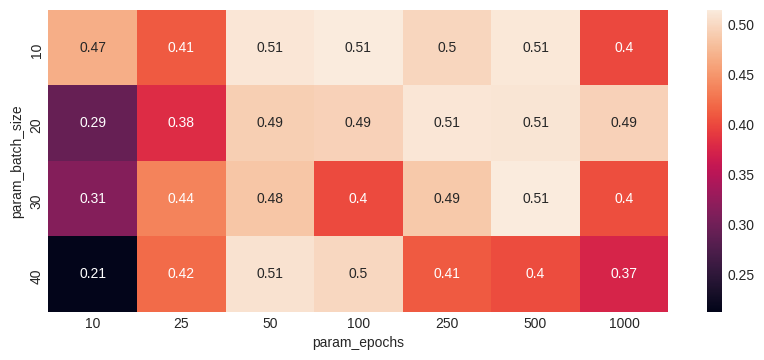

In [251]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(logresults_deeplearning.pivot_table(index='param_batch_size',columns='param_epochs',values='mean_test_score'),annot=True)

From the above analysis we can see that the best score can be obtained when the test score with the Keras Classifier model is used with epochs = 100 and batch size = 10.

### Applying best parameters

In [252]:
model = Sequential()
model.add(Dense(41,input_dim=41,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [253]:
model.fit(X_train_scale.values,Y_train.values,epochs=100,batch_size=10,validation_data=(X_test_scale.values,Y_test.values))

Epoch 1/100
400/400 [==============================] - 0s 727us/step - loss: 0.6588 - accuracy: 0.8271 - val_loss: 0.5681 - val_accuracy: 0.8850
Epoch 2/100
400/400 [==============================] - 0s 542us/step - loss: 0.5458 - accuracy: 0.8850 - val_loss: 0.4881 - val_accuracy: 0.8850
Epoch 3/100
400/400 [==============================] - 0s 531us/step - loss: 0.4713 - accuracy: 0.8882 - val_loss: 0.4371 - val_accuracy: 0.8850
Epoch 4/100
400/400 [==============================] - 0s 512us/step - loss: 0.4301 - accuracy: 0.8828 - val_loss: 0.4046 - val_accuracy: 0.8850
Epoch 5/100
400/400 [==============================] - 0s 513us/step - loss: 0.4000 - accuracy: 0.8840 - val_loss: 0.3848 - val_accuracy: 0.8850
Epoch 6/100
400/400 [==============================] - 0s 488us/step - loss: 0.3862 - accuracy: 0.8816 - val_loss: 0.3726 - val_accuracy: 0.8850
Epoch 7/100
400/400 [==============================] - 0s 501us/step - loss: 0.3582 - accuracy: 0.8929 - val_loss: 0.3656 - val_ac

Epoch 57/100
400/400 [==============================] - 0s 504us/step - loss: 0.1116 - accuracy: 0.9674 - val_loss: 0.4027 - val_accuracy: 0.8840
Epoch 58/100
400/400 [==============================] - 0s 506us/step - loss: 0.1293 - accuracy: 0.9612 - val_loss: 0.4114 - val_accuracy: 0.8870
Epoch 59/100
400/400 [==============================] - 0s 510us/step - loss: 0.1127 - accuracy: 0.9695 - val_loss: 0.4456 - val_accuracy: 0.8800
Epoch 60/100
400/400 [==============================] - 0s 507us/step - loss: 0.1186 - accuracy: 0.9617 - val_loss: 0.4392 - val_accuracy: 0.8810
Epoch 61/100
400/400 [==============================] - 0s 518us/step - loss: 0.1103 - accuracy: 0.9665 - val_loss: 0.4621 - val_accuracy: 0.8820
Epoch 62/100
400/400 [==============================] - 0s 518us/step - loss: 0.0992 - accuracy: 0.9755 - val_loss: 0.4566 - val_accuracy: 0.8830
Epoch 63/100
400/400 [==============================] - 0s 518us/step - loss: 0.0889 - accuracy: 0.9776 - val_loss: 0.4425 -

In [254]:
output_deeplearning = pd.DataFrame(model.history.history)
output_deeplearning.head()

,loss,accuracy,val_loss,val_accuracy
0,0.626319,0.87275,0.568098,0.885
1,0.526023,0.88375,0.488071,0.885
2,0.461618,0.88375,0.437098,0.885
3,0.420877,0.88375,0.404558,0.885
4,0.395440,0.88375,0.384786,0.885


Text(0.5, 0, 'Index')

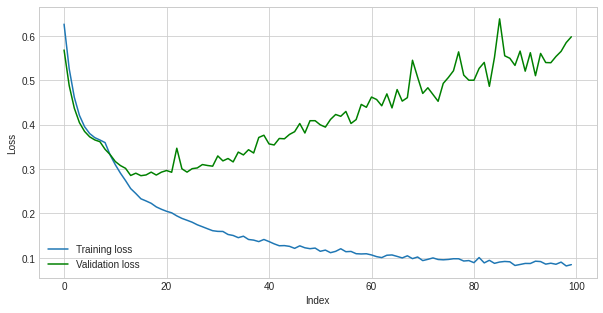

In [255]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['loss'],label='Training loss')
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['val_loss'],label='Validation loss',color='green')
plt.ylabel('Loss')
plt.xlabel('Index')

Text(0.5, 0, 'Epochs')

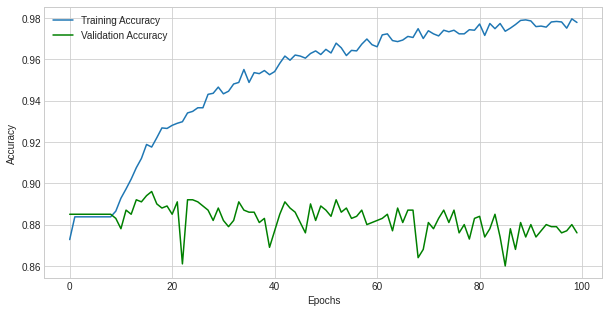

In [256]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['accuracy'],label='Training Accuracy')
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['val_accuracy'],label='Validation Accuracy',color='green')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

From above analysis we see that, as Epochs increases, Accuracy is decreasing. We will have to keep training the model for higher values of Epochs, as we want to maximize F1 score and not the Accuracy.

### Evaluating and Predicting on test data

In [257]:
# evaluate the model
scores = model.evaluate(X_test_scale, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 [==============================] - 0s 499us/step - loss: 0.5979 - accuracy: 0.8760

accuracy: 87.60%


The Deep Learning model accuracy score is 87.60%

In [261]:
# predicting on test data
model.predict_classes(X_test_scale)

/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [259]:
print(classification_report(Y_test,model.predict_classes(X_test_scale)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       885
           1       0.45      0.37      0.41       115

    accuracy                           0.88      1000
   macro avg       0.69      0.66      0.67      1000
weighted avg       0.87      0.88      0.87      1000



/home/jack/PycharmProjects/DataScience_Project_Aditi/venv/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Thus from the above classification report we see that, the Deep Learning Model trained to maximize the F1 score gives the F1 Score of 0.41